In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [296]:
df=pd.read_csv("Company.csv")

In [297]:
df.head(10)

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN
5,6,291.50,573.80,238.60,582.60,31.00,565.30,48.30,110.10,68.50,...,7.25,5.73,4.62,3.72,3807100.00,10.00,12.69,0.63,573.80,11.67
6,7,93.30,329.90,92.50,17.30,0.10,16.00,1.40,14.00,6.40,...,3.49,15.98,12.91,0.00,250000.00,100.00,-12.40,-12.40,329.90,-4.34
7,8,985.10,5435.20,1013.60,1921.20,76.60,2047.10,-49.30,248.10,-49.30,...,5.28,4.24,4.39,8.74,15528850.00,10.00,1.32,1.32,5435.20,NaN
8,9,188.60,526.10,117.20,946.10,21.90,919.30,48.70,108.60,71.20,...,3.55,8.44,3.64,10.46,1120729.00,10.00,4.19,4.19,526.10,NaN
9,10,229.60,280.90,95.90,1272.00,15.70,1280.00,7.70,31.80,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,280.90,NaN


In [298]:
df.columns = df.columns.str.replace(' ', '_').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('(', '').str.replace(')', '').str.replace('&', 'and')

In [299]:
df.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN


In [300]:
df.shape

(4256, 51)

In [301]:
df.drop('Num',axis=1,inplace=True)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Networth_Next_Year                              4256 non-null   float64
 1   Total_assets                                    4256 non-null   float64
 2   Net_worth                                       4256 non-null   float64
 3   Total_income                                    4025 non-null   float64
 4   Change_in_stock                                 3706 non-null   float64
 5   Total_expenses                                  4091 non-null   float64
 6   Profit_after_tax                                4102 non-null   float64
 7   PBDITA                                          4102 non-null   float64
 8   PBT                                             4102 non-null   float64
 9   Cash_profit                              

In [303]:
pd.options.display.float_format = '{:.2f}'.format 

In [304]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total_assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net_worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total_income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change_in_stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total_expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit_after_tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60
Cash_profit,4102.00,408.27,4143.93,-2245.70,2.90,19.40,96.25,176911.80


# EDA

## Univariate analysis

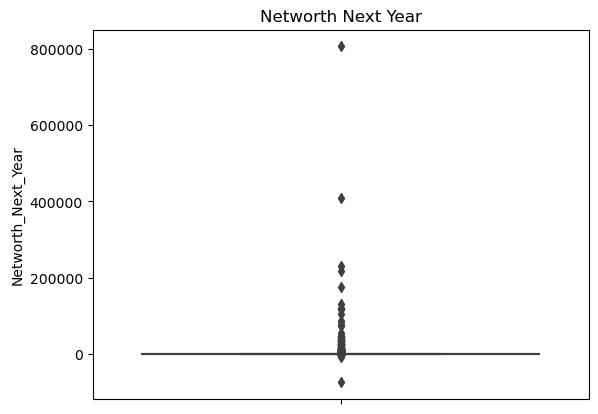

In [305]:
sns.boxplot(data=df,y='Networth_Next_Year')
plt.title("Networth Next Year");

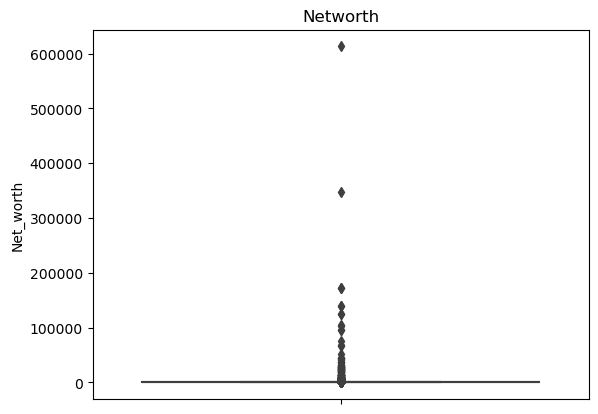

In [306]:
sns.boxplot(data=df,y='Net_worth')
plt.title("Networth");

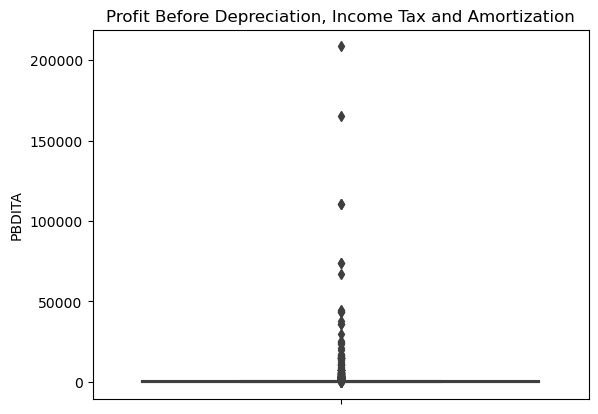

In [307]:
sns.boxplot(data=df,y='PBDITA')
plt.title("Profit Before Depreciation, Income Tax and Amortization");

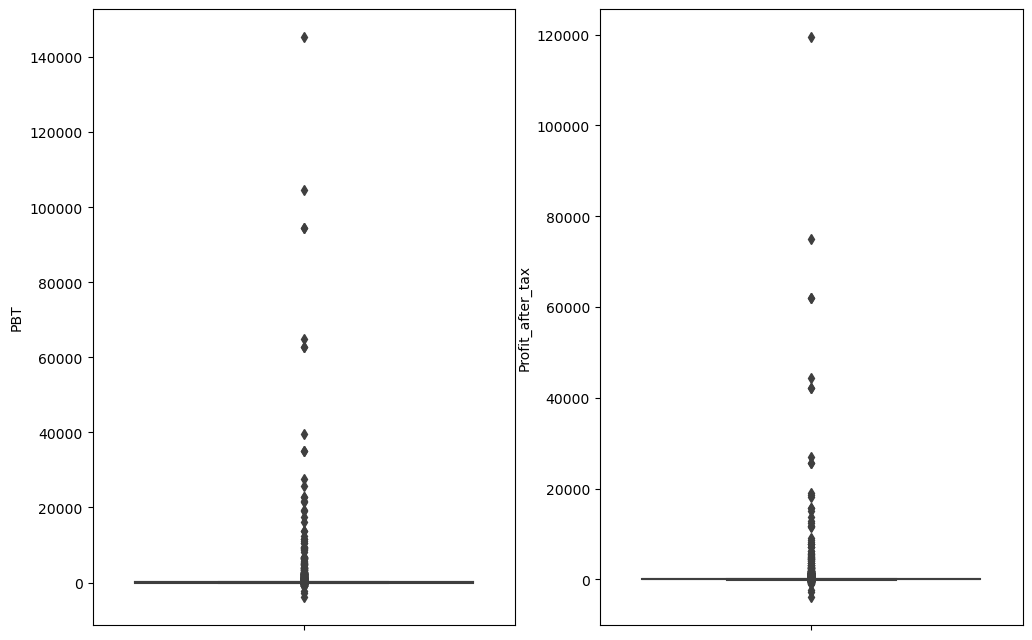

In [308]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(12,8)
sns.boxplot(data=df,y='PBT',ax=axes[0])
sns.boxplot(data=df,y='Profit_after_tax',ax=axes[1])
plt.tight_layout;


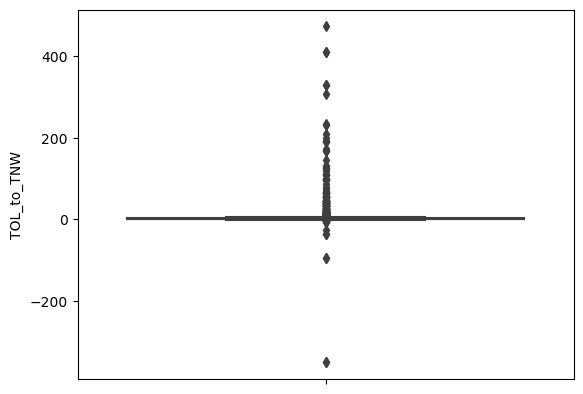

In [309]:
sns.boxplot(data=df,y='TOL_to_TNW');

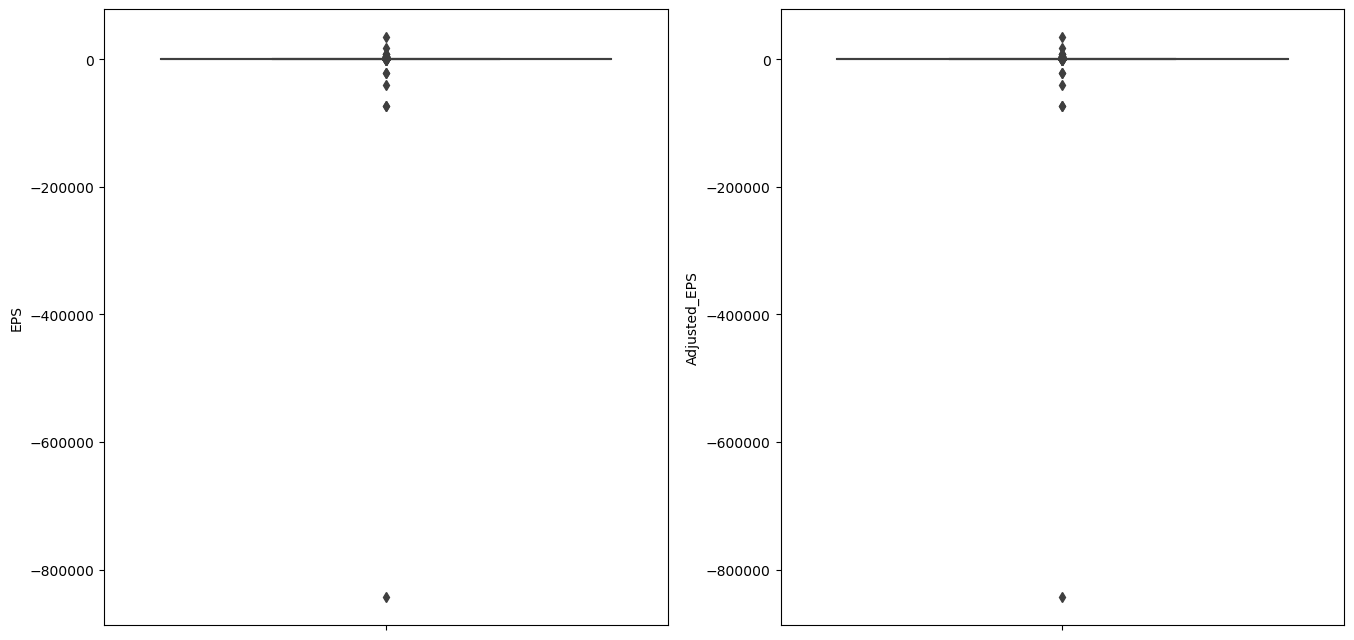

In [310]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.boxplot(data=df,y='EPS',ax=axes[0])
sns.boxplot(data=df,y='Adjusted_EPS',ax=axes[1])
plt.tight_layout;


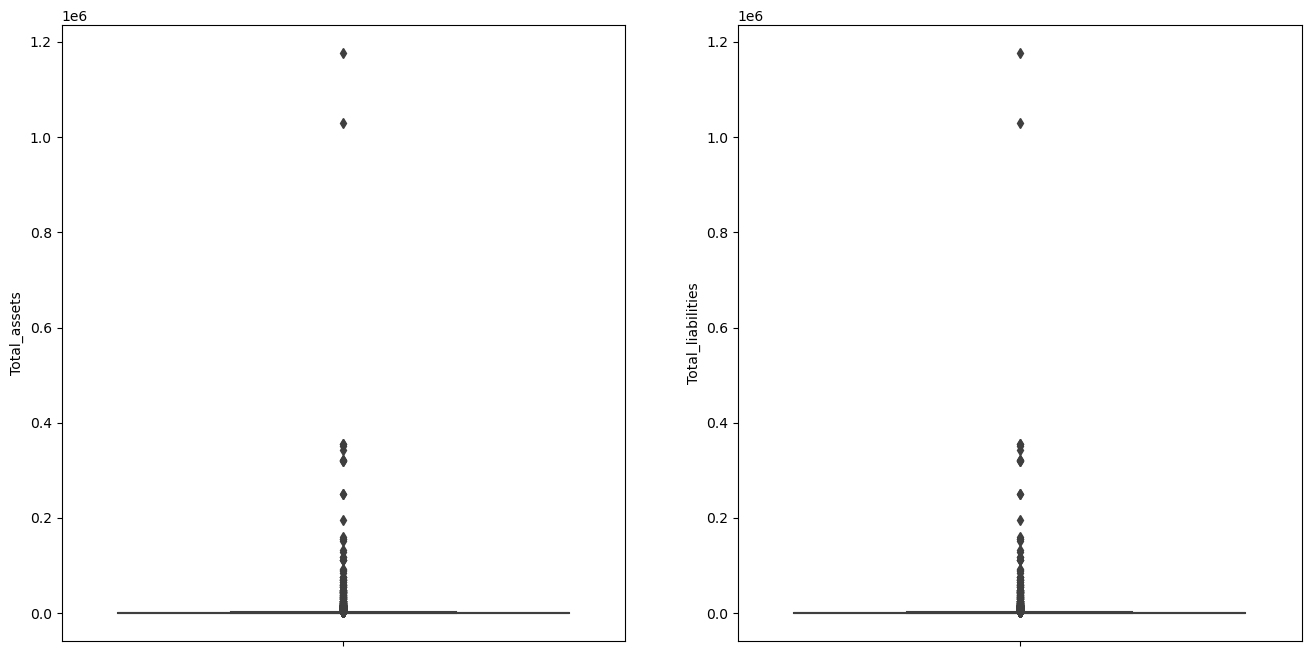

In [311]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.boxplot(data=df,y='Total_assets',ax=axes[0])
sns.boxplot(data=df,y='Total_liabilities',ax=axes[1])
plt.tight_layout;


In [312]:
df['Total_assets'].sort_values(ascending=False).head(10)

4149   1176509.20
1012   1028927.70
2794    354727.30
904     354727.30
2825    351433.60
1847    342407.20
3858    321314.60
2518    321314.60
2328    318611.70
3108    318611.70
Name: Total_assets, dtype: float64

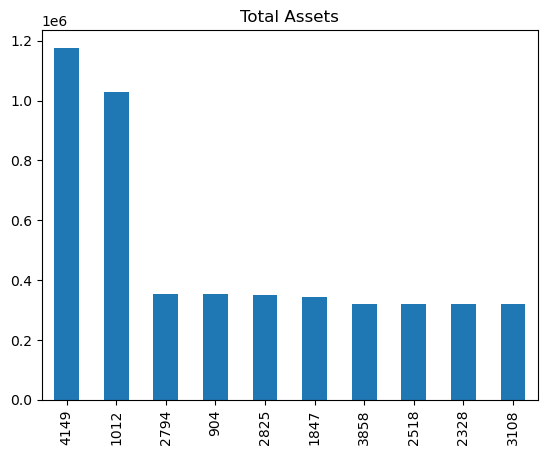

In [313]:
df['Total_assets'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Total Assets');

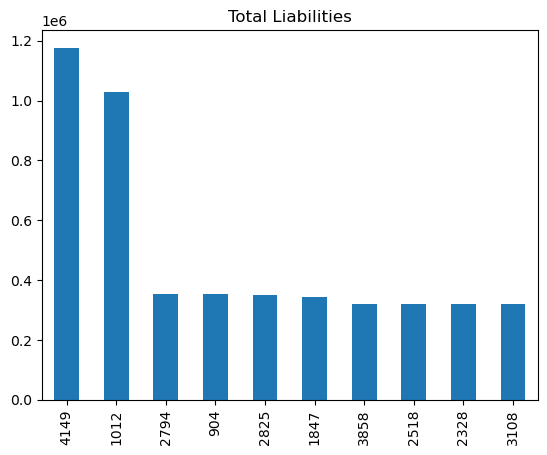

In [314]:
df['Total_liabilities'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Total Liabilities');

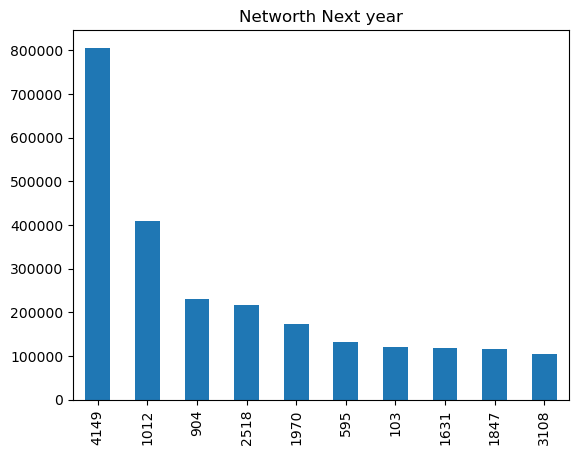

In [315]:
df['Networth_Next_Year'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Networth Next year');

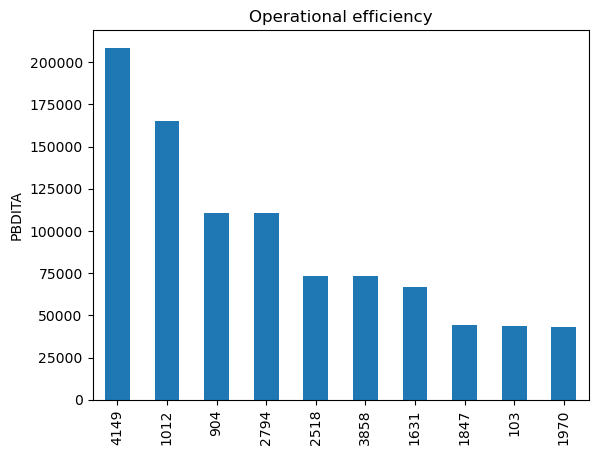

In [316]:
df['PBDITA'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Operational efficiency')
plt.ylabel('PBDITA');

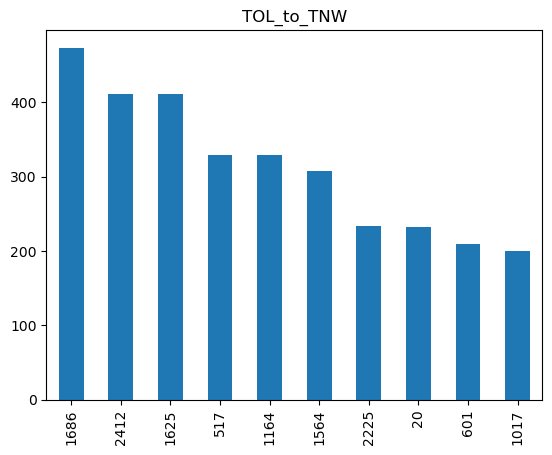

In [317]:
df['TOL_to_TNW'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('TOL_to_TNW');

### A higher ratio suggests higher financial risk because the company relies more on borrowed funds.


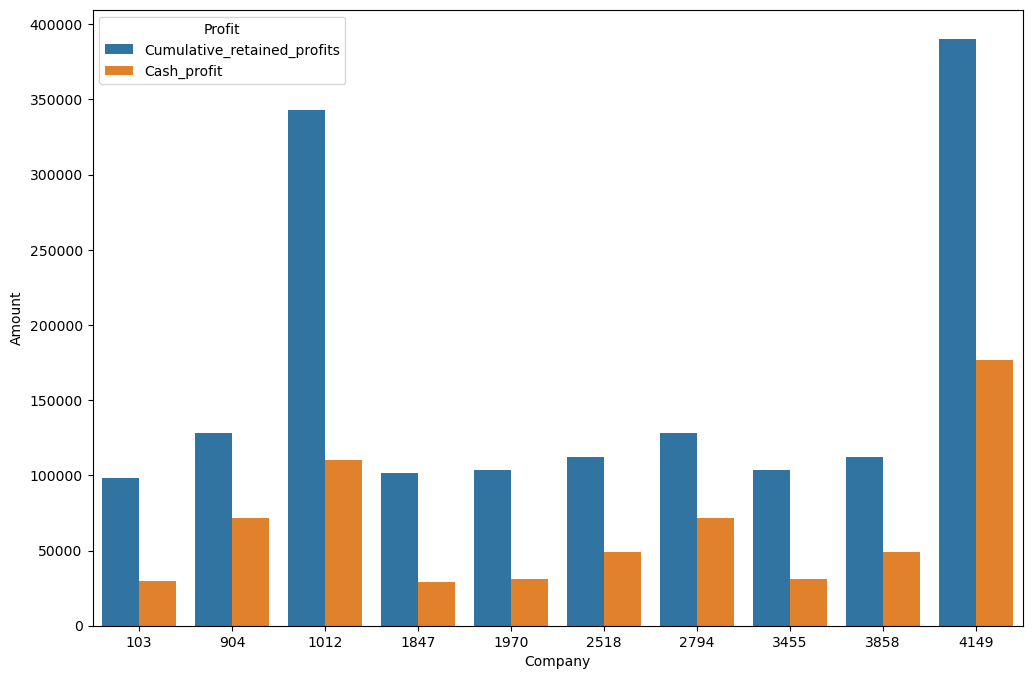

In [318]:
df_top10_Cumulative_Profit = df.nlargest(10, 'Cumulative_retained_profits')
df_top10_Cumulative_Profit_melted = df_top10_Cumulative_Profit.reset_index().melt(id_vars='index', value_vars=['Cumulative_retained_profits', 'Cash_profit'], var_name='Profit', value_name='Amount')
plt.figure(figsize=(12,8))
sns.barplot(x='index', y='Amount', hue='Profit', data=df_top10_Cumulative_Profit_melted, dodge=True)
plt.xlabel("Company");


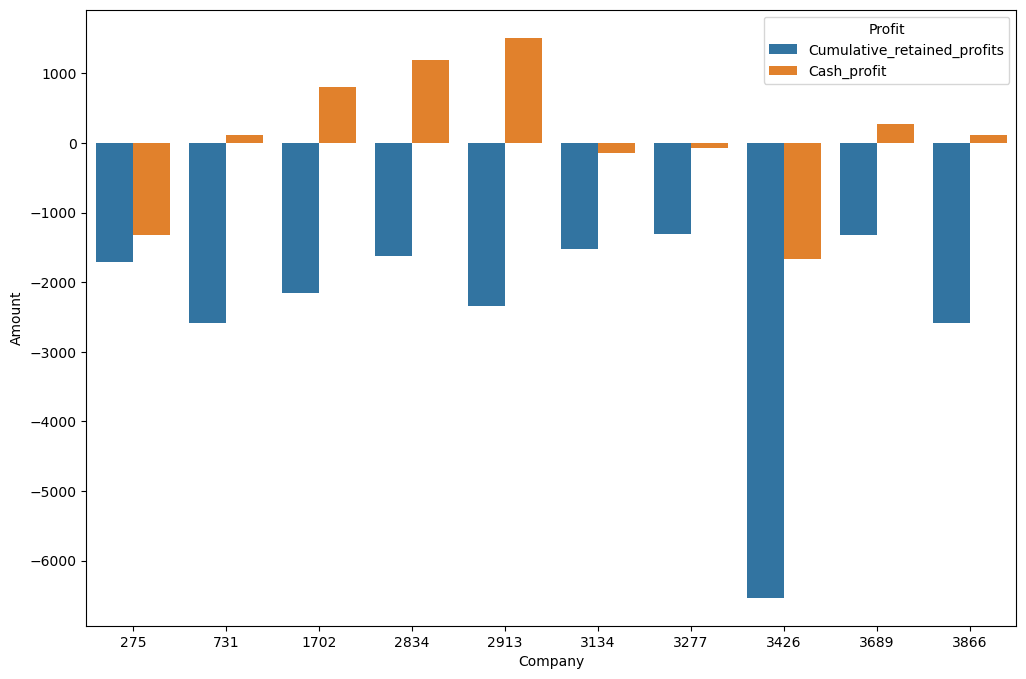

In [319]:
df_bottom_Cumulative_Profit = df.nsmallest(10, 'Cumulative_retained_profits')
df_bottom10_Cumulative_Profit_melted = df_bottom_Cumulative_Profit.reset_index().melt(id_vars='index', value_vars=['Cumulative_retained_profits', 'Cash_profit'], var_name='Profit', value_name='Amount')
plt.figure(figsize=(12,8))
sns.barplot(x='index', y='Amount', hue='Profit', data=df_bottom10_Cumulative_Profit_melted,dodge=True)
plt.xlabel("Company");


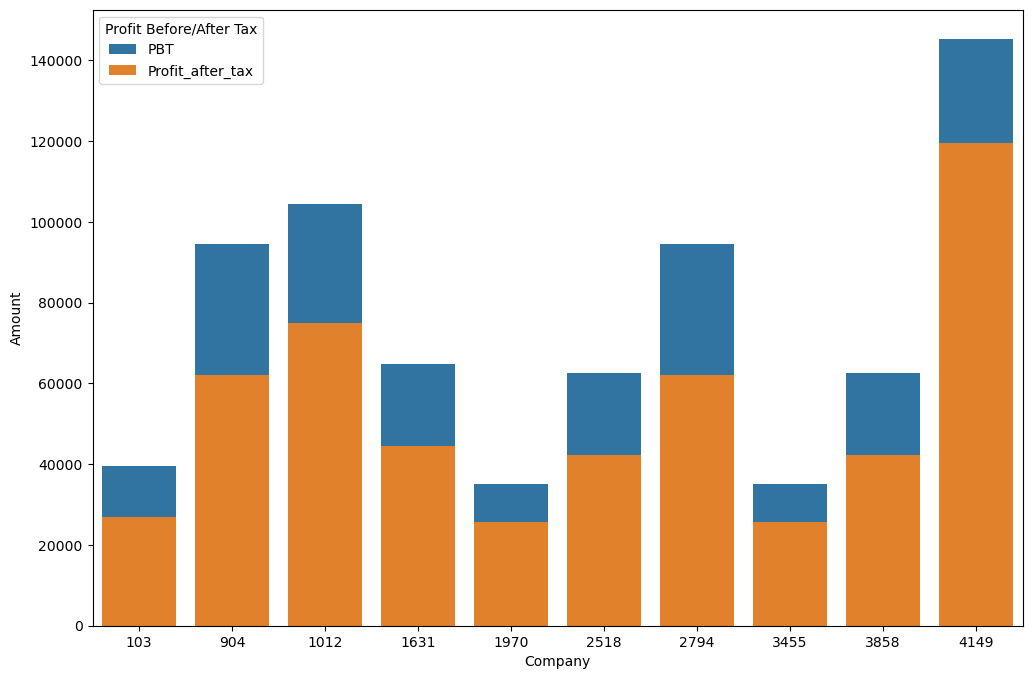

In [320]:
df_top10_PBT = df.nlargest(10, 'PBT')
df_top10_PBT_melted = df_top10_PBT.reset_index().melt(id_vars='index', value_vars=['PBT', 'Profit_after_tax'], var_name='Profit Before/After Tax', value_name='Amount')
plt.figure(figsize=(12,8))
sns.barplot(x='index', y='Amount', hue='Profit Before/After Tax', data=df_top10_PBT_melted, dodge=False)
plt.xlabel("Company");

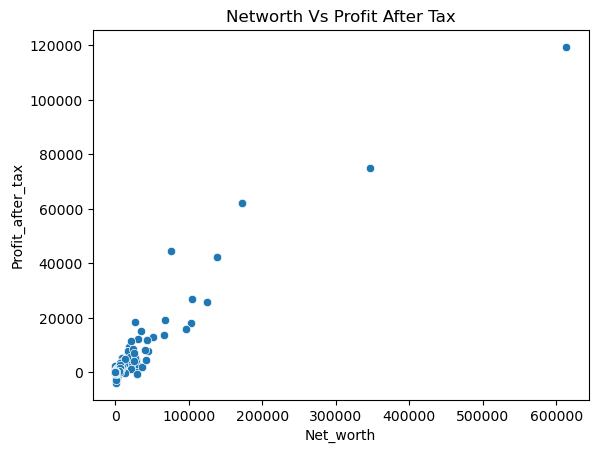

In [321]:
sns.scatterplot(data=df,x='Net_worth',y='Profit_after_tax')
plt.title('Networth Vs Profit After Tax');

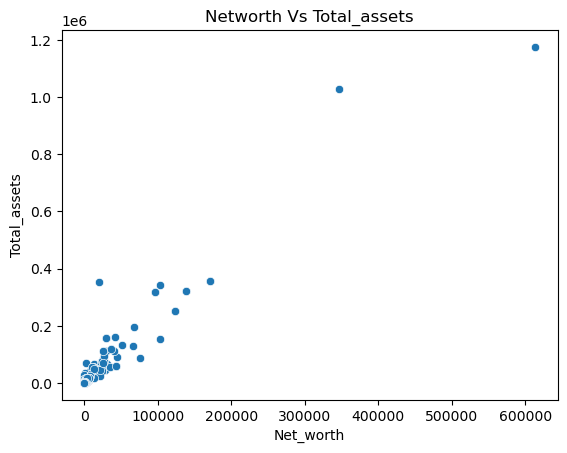

In [322]:
sns.scatterplot(data=df,x='Net_worth',y='Total_assets')
plt.title('Networth Vs Total_assets');

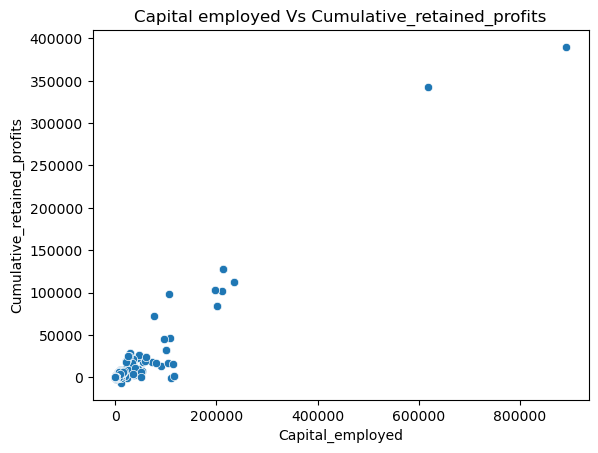

In [323]:
sns.scatterplot(data=df,x='Capital_employed',y='Cumulative_retained_profits')
plt.title('Capital employed Vs Cumulative_retained_profits');

In [324]:
df['Default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [325]:
df['Default'].value_counts()

Default
0    3352
1     904
Name: count, dtype: int64

In [326]:
df['Default'].value_counts(normalize=True)

Default
0   0.79
1   0.21
Name: proportion, dtype: float64

In [327]:
df.drop('Networth_Next_Year',axis=1,inplace=True)

In [328]:
df.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,Default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN,0
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN,0
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN,0
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN,0
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN,0


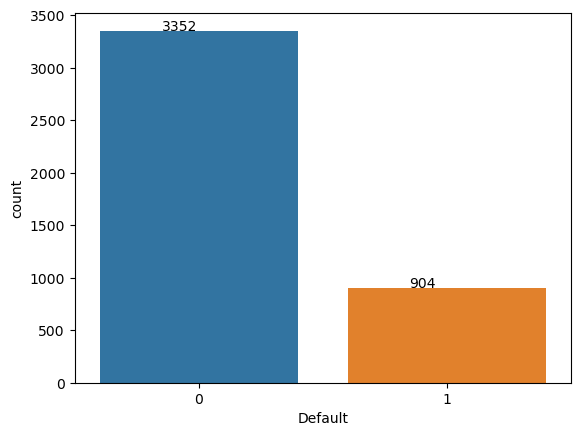

In [329]:
ax=sns.countplot(data=df,x='Default')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

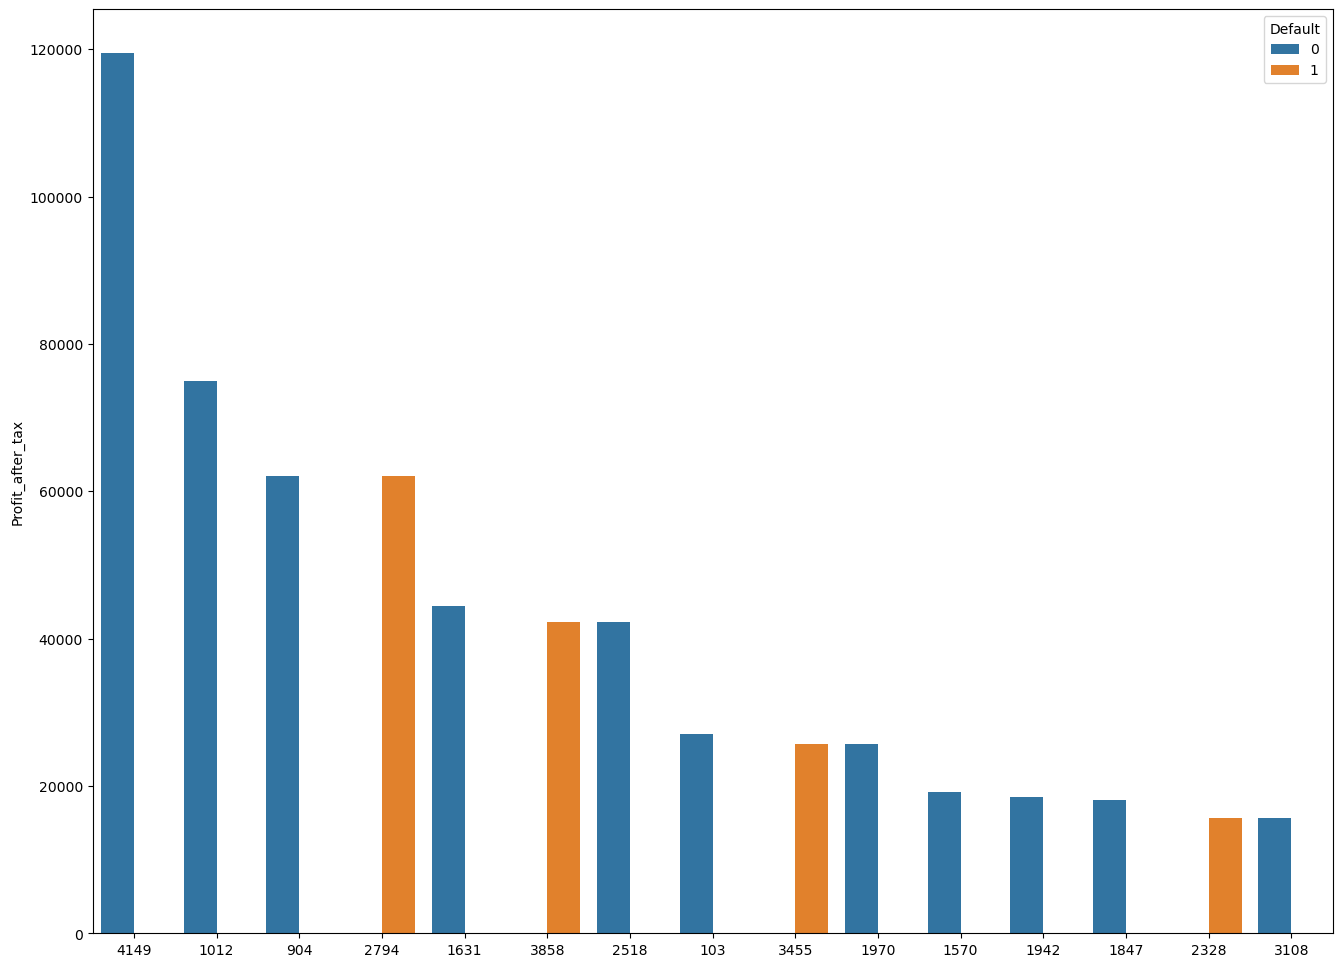

In [330]:
plt.figure(figsize=(16,12))
sns.barplot(data=df,x=df.index,y='Profit_after_tax',order=df['Profit_after_tax'].sort_values(ascending=False).head(15).index,hue='Default');

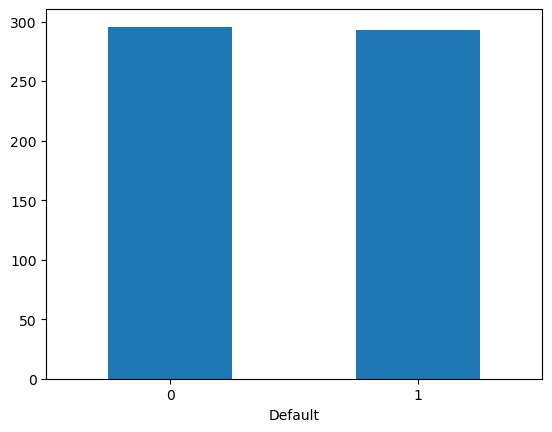

In [331]:
df.groupby('Default')['Profit_after_tax'].mean().plot(kind='bar')
plt.xticks(rotation=0);

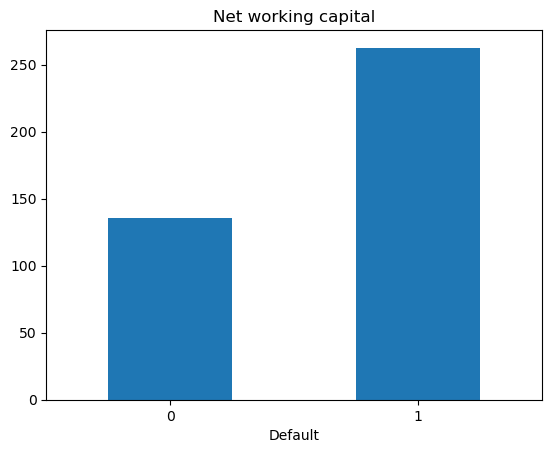

In [332]:
df.groupby('Default')['Net_working_capital'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Net working capital');

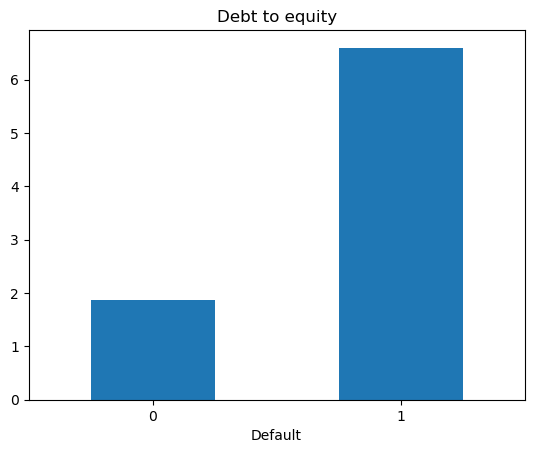

In [333]:
df.groupby('Default')['Debt_to_equity_ratio_times'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Debt to equity');


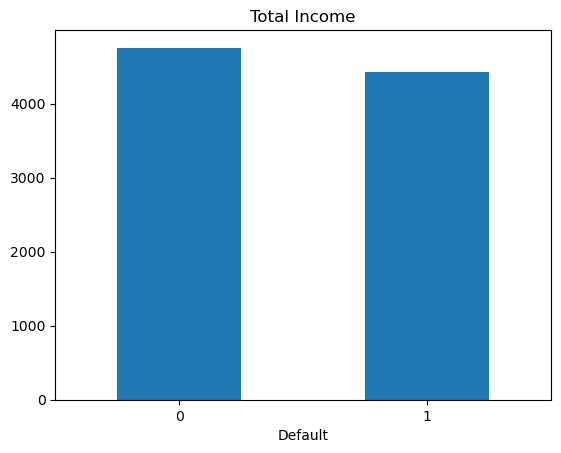

In [334]:
df.groupby('Default')['Total_income'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Total Income');

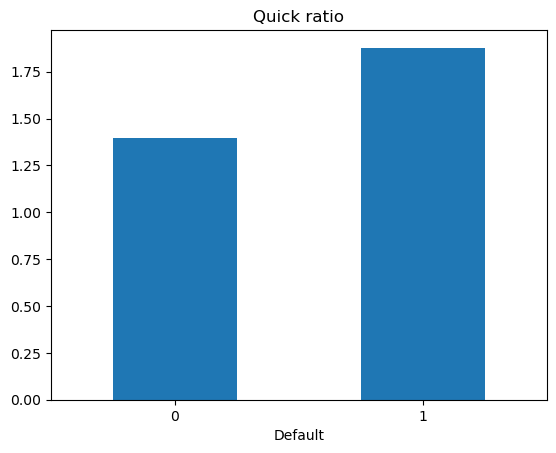

In [335]:
df.groupby('Default')['Quick_ratio_times'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Quick ratio');

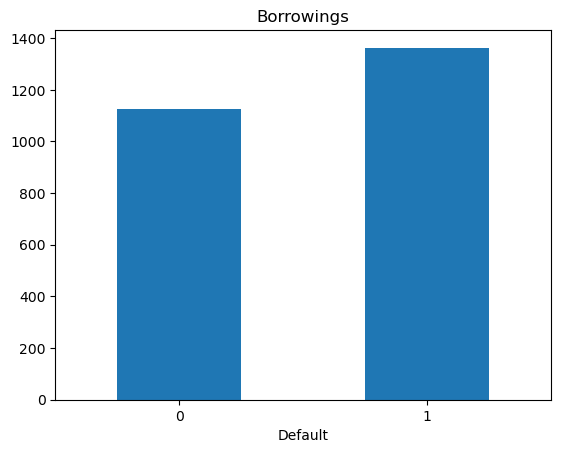

In [336]:
df.groupby('Default')['Borrowings'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Borrowings');

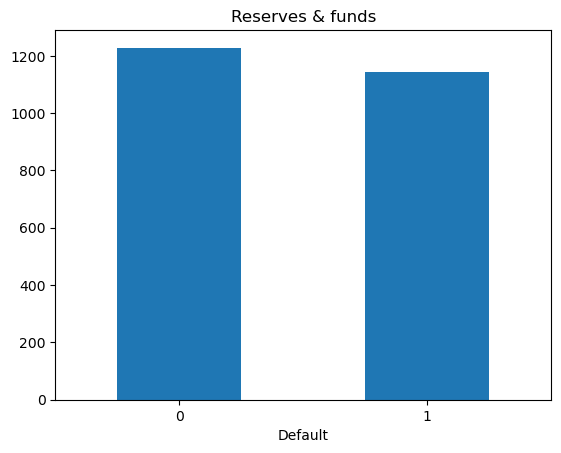

In [337]:
df.groupby('Default')['Reserves_and_funds'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Reserves & funds');

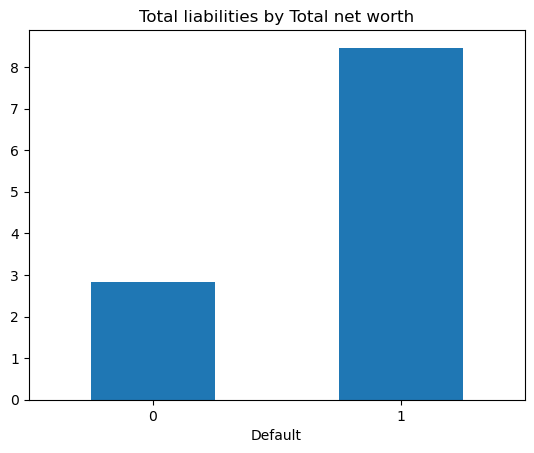

In [338]:
df.groupby('Default')['TOL_to_TNW'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Total liabilities by Total net worth');

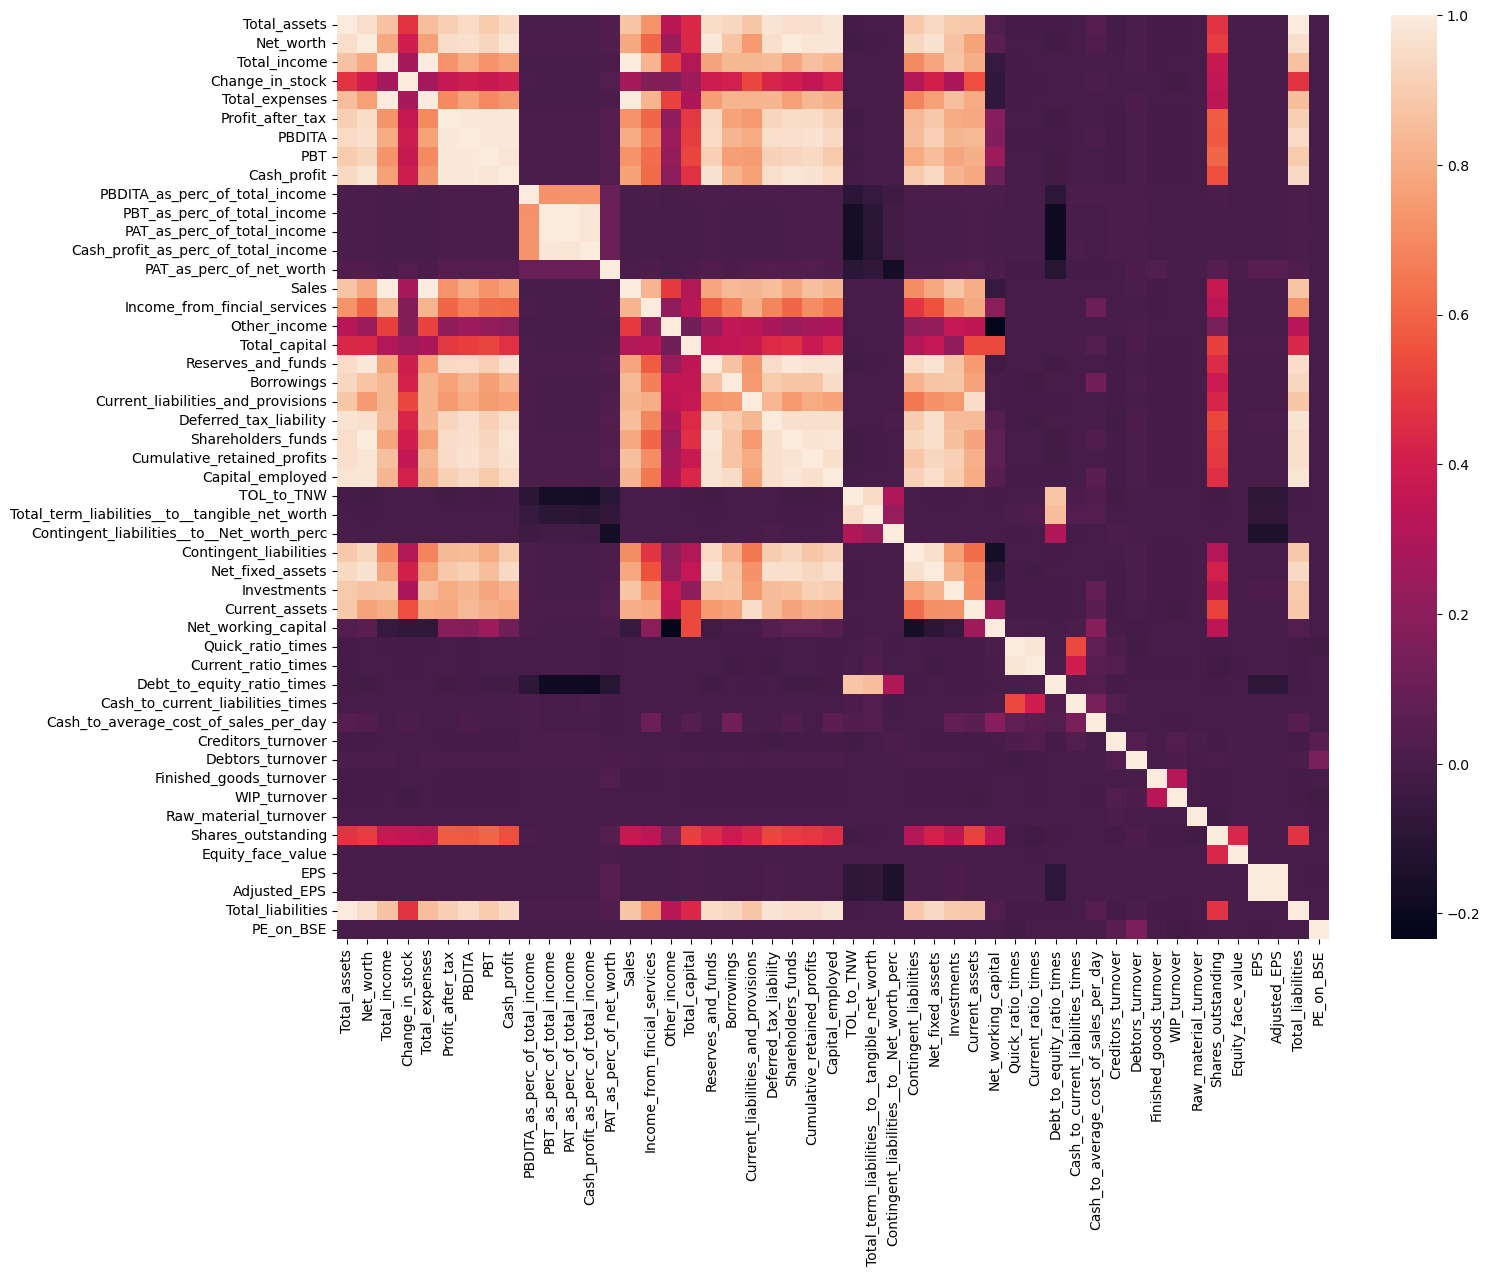

In [339]:
plt.figure(figsize = (16,12))
cor_matrix = df.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix);

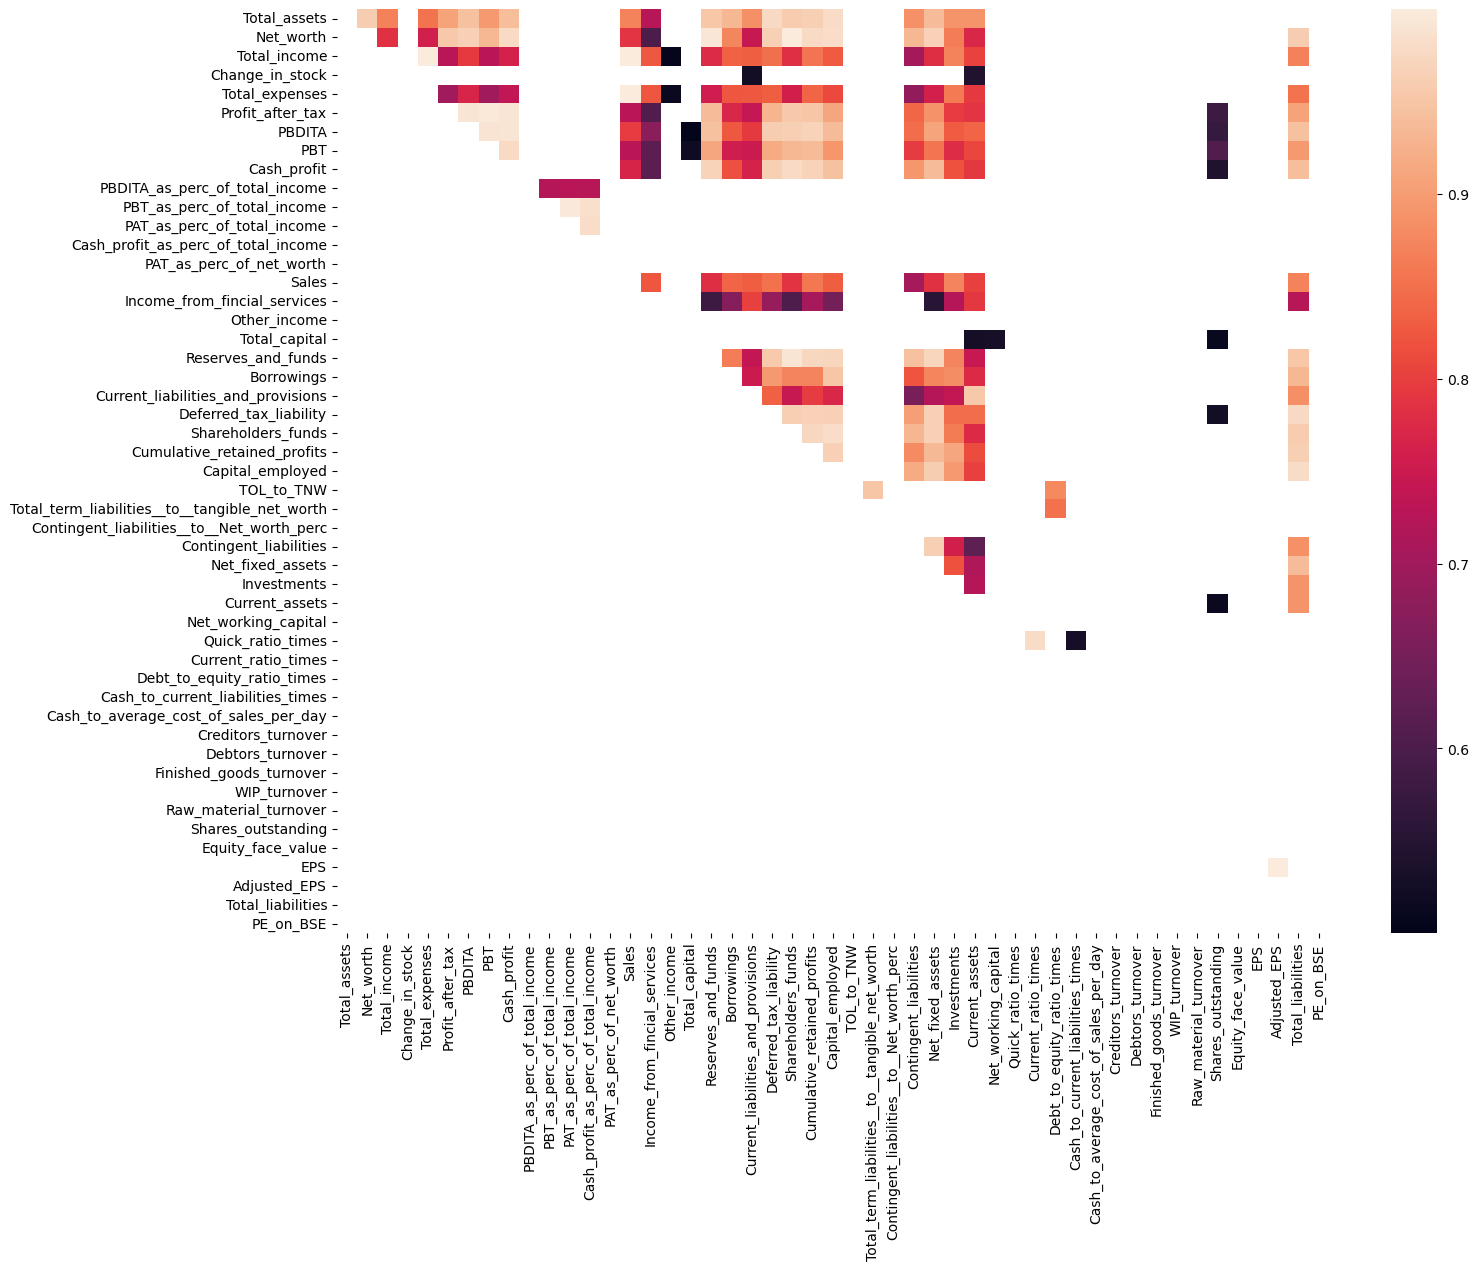

In [340]:
corr=df.drop('Default', axis = 1).corr()
max_corr=corr[(corr>0.5)& (corr < 1)]
mask = max_corr.where(np.triu(np.ones(max_corr.shape), k=1).astype(bool))
plt.figure(figsize=(16,12))
sns.heatmap(mask);

In [341]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [342]:
((df > UL) | (df < LL)).sum()

Total_assets                                       88
Net_worth                                          89
Total_income                                       85
Change_in_stock                                    87
Total_expenses                                     80
Profit_after_tax                                   88
PBDITA                                             86
PBT                                                91
Cash_profit                                        91
PBDITA_as_perc_of_total_income                     81
PBT_as_perc_of_total_income                        90
PAT_as_perc_of_total_income                       105
Cash_profit_as_perc_of_total_income                88
PAT_as_perc_of_net_worth                           49
Sales                                              83
Income_from_fincial_services                       77
Other_income                                       69
Total_capital                                      80
Reserves_and_funds          

In [343]:
df[((df > UL) | (df < LL))]= np.nan

In [344]:
(df.isnull().sum()/len(df))*100

Total_assets                                      2.07
Net_worth                                         2.09
Total_income                                      7.42
Change_in_stock                                  14.97
Total_expenses                                    5.76
Profit_after_tax                                  5.69
PBDITA                                            5.64
PBT                                               5.76
Cash_profit                                       5.76
PBDITA_as_perc_of_total_income                    3.76
PBT_as_perc_of_total_income                       3.97
PAT_as_perc_of_total_income                       4.32
Cash_profit_as_perc_of_total_income               3.92
PAT_as_perc_of_net_worth                          1.15
Sales                                             9.12
Income_from_fincial_services                     27.91
Other_income                                     38.18
Total_capital                                     2.00
Reserves_a

## Columns Other_income,Deferred_tax_liability,Contingent_liabilities,Investments,PE_on_BSE have null values more than 30% of the whole data.Therefore we are dropping them

In [345]:
df.drop(['Other_income','Deferred_tax_liability','Contingent_liabilities','Investments','PE_on_BSE'],axis=1,inplace=True)

In [346]:
df.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,Default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,0
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,0
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,0
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,0
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,0


In [347]:
df.shape

(4256, 45)

## Checking null values by row

In [348]:
df1 = df[df.isnull().sum(axis = 1) <= 4]

In [349]:
(df1.isnull().sum()/len(df1))*100

Total_assets                                      0.00
Net_worth                                         0.03
Total_income                                      0.03
Change_in_stock                                   3.55
Total_expenses                                    0.03
Profit_after_tax                                  0.18
PBDITA                                            0.03
PBT                                               0.12
Cash_profit                                       0.03
PBDITA_as_perc_of_total_income                    0.21
PBT_as_perc_of_total_income                       0.39
PAT_as_perc_of_total_income                       0.60
Cash_profit_as_perc_of_total_income               0.24
PAT_as_perc_of_net_worth                          0.69
Sales                                             0.09
Income_from_fincial_services                     19.43
Total_capital                                     0.66
Reserves_and_funds                                0.09
Borrowings

## All the columns have less than 30% of null values

In [350]:
!pip install fancyimpute


## Imputing missing values

In [351]:
predictor=df1.drop('Default',axis=1)
response=df1['Default']

### MICE (Multiple Imputation by Chained Equation) imputes missing values with reasonable estimates (e.g., mean, median, or regression predictions)

In [352]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer(random_state=1)

In [353]:
imputed_data= mice_imputer.fit_transform(predictor)

In [354]:
df1_imputed = pd.DataFrame(imputed_data, columns=predictor.columns)

In [355]:
df1_imputed.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,11.60,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60
1,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,2.24,2.51,17.67,8.76,8.35,4055096.94,16.44,0.00,0.00,238.40
2,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,3.48,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50
3,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,21.67,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90
4,573.80,238.60,582.60,31.00,565.30,48.30,110.10,68.50,82.60,18.90,...,12.52,7.25,5.73,4.62,3.72,3807100.00,10.00,12.69,0.63,573.80


In [356]:
df.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,Default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,0
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,0
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,0
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,0
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,0


In [357]:
df1_imputed['Equity_face_value'].value_counts().head(15)

Equity_face_value
10.00     2458
100.00     251
5.00        53
1.00        40
2.00        36
4.00         3
2.50         3
17.77        2
15.54        2
14.15        2
9.95         2
13.76        2
15.27        2
15.28        2
16.03        2
Name: count, dtype: int64

In [358]:
2458/4256

0.5775375939849624

## As more than 50% of the face value column has a constant value of 10,we are going to drop it.

In [359]:
df1_imputed.drop('Equity_face_value',axis=1,inplace=True)

In [360]:
df1_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

In [361]:
response.isnull().sum()

0

In [362]:
df2 = df1_imputed.merge(response, left_index=True, right_index=True)
df2.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,Default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,11.60,5.65,3.99,3.37,14.87,8760056.00,4.44,4.44,827.60,0
2,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,3.48,1.91,18.14,18.62,11.11,10000000.00,17.60,17.60,6883.50,0
3,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,21.67,68.00,45.87,28.67,19.93,107315.00,-6.52,-6.52,90.90,0
4,573.80,238.60,582.60,31.00,565.30,48.30,110.10,68.50,82.60,18.90,...,12.52,7.25,5.73,4.62,3.72,3807100.00,12.69,0.63,573.80,0
5,329.90,92.50,17.30,0.10,16.00,1.40,14.00,6.40,6.80,80.92,...,0.08,3.49,15.98,12.91,0.00,250000.00,-12.40,-12.40,329.90,0


In [363]:
df1_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

In [364]:
df2.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

In [365]:
df2.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,Default
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,11.60,5.65,3.99,3.37,14.87,8760056.00,4.44,4.44,827.60,0
2,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,3.48,1.91,18.14,18.62,11.11,10000000.00,17.60,17.60,6883.50,0
3,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,21.67,68.00,45.87,28.67,19.93,107315.00,-6.52,-6.52,90.90,0
4,573.80,238.60,582.60,31.00,565.30,48.30,110.10,68.50,82.60,18.90,...,12.52,7.25,5.73,4.62,3.72,3807100.00,12.69,0.63,573.80,0
5,329.90,92.50,17.30,0.10,16.00,1.40,14.00,6.40,6.80,80.92,...,0.08,3.49,15.98,12.91,0.00,250000.00,-12.40,-12.40,329.90,0


 # Model Building

## Train-Test Split

In [366]:
Train,Test=train_test_split(df2, test_size=0.30, random_state=1,stratify=df2['Default'])

In [367]:
Train

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,Default
745,206.50,187.80,86.60,0.40,73.30,13.70,25.10,19.20,19.60,28.98,...,11.37,5.11,13.59,16.17,2.07,540000.00,25.19,25.19,206.50,0
1512,132.20,60.80,118.90,-0.10,114.60,4.20,18.70,4.70,12.40,15.73,...,4.16,3.70,49.42,46.13,4.77,5000100.00,0.90,0.90,132.20,0
528,70.10,15.00,393.70,-1.20,392.50,0.00,4.90,1.60,3.00,1.24,...,36.66,24.65,92.11,91.98,24.64,645000.00,0.00,0.00,70.10,1
2630,1639.80,776.30,2787.10,155.10,2896.00,46.20,117.20,73.80,48.40,4.21,...,15.74,14.33,18.37,5.01,14.33,4914000.00,9.65,9.65,1639.80,1
1941,339.80,78.00,246.00,8.50,193.40,61.10,91.80,78.10,71.60,37.32,...,3.47,7.10,6.22,3.64,2.99,6522160.00,9.37,6.25,339.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,271.00,81.80,190.30,9.30,185.30,14.30,41.50,13.10,28.40,21.81,...,5.11,6.92,11.99,3.00,11.35,6240000.00,2.21,2.21,271.00,0
1498,10.50,2.00,22.10,-0.20,21.00,0.90,1.00,0.90,1.00,4.52,...,2.81,4.62,31.65,20.93,16.77,950000.00,0.95,0.95,10.50,1
2764,679.70,247.60,1156.50,-192.80,899.80,63.90,144.00,96.70,88.10,12.45,...,10.55,11.39,24.99,7.82,3.41,200000.00,12.40,11.04,679.70,0
1944,160.30,27.50,512.90,9.50,521.80,0.60,10.50,2.20,4.00,2.05,...,13.40,30.64,14.94,14.72,11.22,3230330.57,0.00,0.00,160.30,1


## Scaling

In [368]:
X_train = Train.drop('Default',axis = 1)
y_train = Train.pop('Default')
X_test = Test.drop('Default', axis = 1)
y_test = Test.pop('Default')

In [369]:
X_train.shape

(1819, 43)

In [370]:
X_test.shape

(780, 43)

In [371]:
y_train.value_counts(normalize=True)

Default
0   0.80
1   0.20
Name: proportion, dtype: float64

In [372]:
y_test.value_counts(normalize=True)

Default
0   0.81
1   0.19
Name: proportion, dtype: float64

In [373]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [374]:
Xtrain_scaled.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities
0,-0.45,-0.29,-0.54,-0.22,-0.54,-0.29,-0.42,-0.30,-0.38,1.58,...,1.86,-0.01,-0.43,-0.42,-0.10,-0.76,-0.30,0.54,0.60,-0.45
1,-0.48,-0.44,-0.52,-0.23,-0.52,-0.35,-0.44,-0.36,-0.41,0.38,...,-0.42,-0.52,-0.53,0.18,1.15,-0.51,-0.18,-0.37,-0.34,-0.48
2,-0.51,-0.50,-0.41,-0.24,-0.41,-0.37,-0.48,-0.37,-0.45,-0.93,...,-0.11,1.76,0.98,0.89,3.06,1.34,-0.29,-0.40,-0.37,-0.51
3,0.19,0.40,0.56,2.30,0.65,-0.11,-0.15,-0.07,-0.25,-0.66,...,-0.39,0.29,0.23,-0.34,-0.56,0.38,-0.18,-0.04,-0.00,0.19
4,-0.39,-0.42,-0.47,-0.09,-0.49,-0.03,-0.22,-0.06,-0.14,2.33,...,0.28,-0.57,-0.29,-0.54,-0.62,-0.68,-0.14,-0.05,-0.13,-0.39


In [375]:
X_test_scaled.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities
0,-0.51,-0.45,-0.53,-0.27,-0.53,-0.35,-0.48,-0.40,-0.42,0.17,...,-0.30,-0.30,0.28,-0.24,-0.10,0.26,-0.16,-0.40,-0.36,-0.51
1,-0.35,-0.38,-0.45,-0.14,-0.45,-0.29,-0.33,-0.29,-0.29,0.72,...,-0.32,0.21,0.00,-0.42,-0.34,-0.85,-0.10,-0.34,-0.30,-0.35
2,-0.48,-0.52,-0.49,-0.28,-0.48,-0.49,-0.49,-0.49,-0.46,-0.54,...,-0.23,-0.56,0.02,-0.41,-0.32,-0.16,-0.14,-0.53,-0.50,-0.48
3,-0.45,-0.43,-0.49,-0.17,-0.49,-0.36,-0.46,-0.38,-0.42,-0.07,...,0.25,-0.48,-0.46,0.14,0.12,-0.37,-0.34,-0.35,-0.31,-0.45
4,-0.47,-0.45,-0.50,-0.12,-0.50,-0.35,-0.45,-0.36,-0.43,0.09,...,2.79,-0.46,-0.13,-0.55,-0.64,-0.62,-0.49,-0.03,0.03,-0.47


## Random Forest

In [376]:
rfcl = RandomForestClassifier()
rfcl.fit(Xtrain_scaled,y_train)

RandomForestClassifier()

In [377]:
RF_train=rfcl.predict(Xtrain_scaled)
print(metrics.classification_report(y_train,RF_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1463
           1       0.96      0.86      0.91       356

    accuracy                           0.97      1819
   macro avg       0.96      0.93      0.94      1819
weighted avg       0.97      0.97      0.96      1819



In [378]:
print(metrics.confusion_matrix(y_train,RF_train))

[[1450   13]
 [  50  306]]


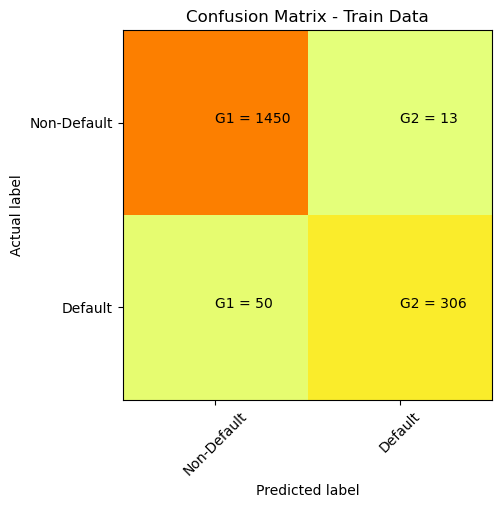

In [379]:
cm = metrics.confusion_matrix(y_train,RF_train)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non-Default', 'Default']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [380]:
RF_test=rfcl.predict(X_test_scaled)
print(metrics.classification_report(y_test,RF_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       628
           1       0.19      0.13      0.15       152

    accuracy                           0.72       780
   macro avg       0.49      0.50      0.49       780
weighted avg       0.68      0.72      0.70       780



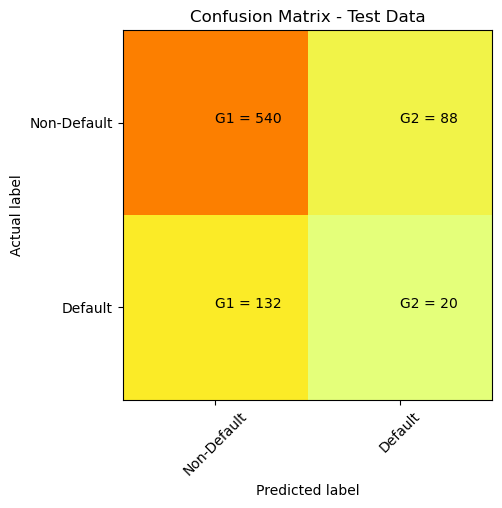

In [414]:
cm = metrics.confusion_matrix(y_test,RF_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non-Default', 'Default']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Logistic Regression using Sklearn

In [381]:
from sklearn.linear_model import LogisticRegression

In [382]:
LogR = LogisticRegression()

In [383]:
LogR.fit(Xtrain_scaled,y_train)

LogisticRegression()

In [384]:
LogR_predict_train=LogR.predict(Xtrain_scaled)
print(metrics.classification_report(y_train,LogR_predict_train))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1463
           1       0.67      0.02      0.04       356

    accuracy                           0.81      1819
   macro avg       0.74      0.51      0.47      1819
weighted avg       0.78      0.81      0.73      1819



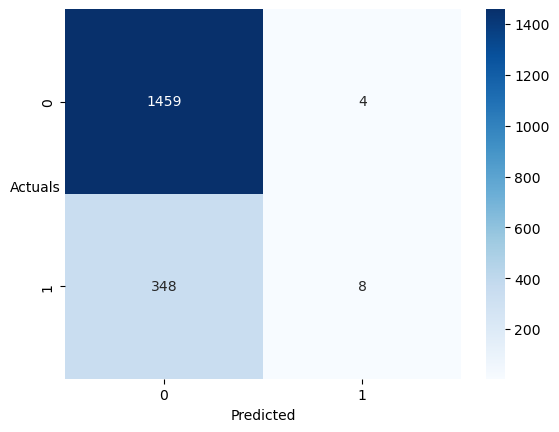

In [385]:
sns.heatmap((metrics.confusion_matrix(y_train,LogR_predict_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [386]:
LogR_predict_test=LogR.predict(X_test_scaled)
print(metrics.classification_report(y_test,LogR_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       628
           1       0.11      0.01      0.01       152

    accuracy                           0.80       780
   macro avg       0.46      0.50      0.45       780
weighted avg       0.67      0.80      0.72       780



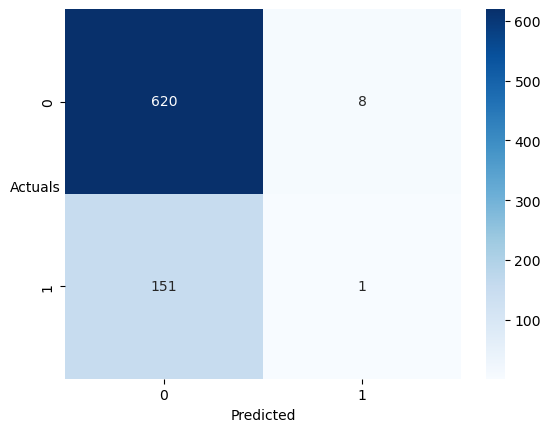

In [387]:
sns.heatmap((metrics.confusion_matrix(y_test,LogR_predict_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Feature selection using Recursive Feature Elimination

In [396]:
from sklearn.feature_selection import RFE 

In [397]:
LogR1= LogisticRegression()
selector = RFE(estimator = LogR1, n_features_to_select=10, step=1)

In [398]:
selector = selector.fit(Xtrain_scaled, y_train)

In [399]:
selector.ranking_

array([ 1,  3, 22, 34,  9, 19,  1,  1,  1, 18,  6,  7, 13, 30,  1,  8,  2,
       33,  1, 32,  1,  1, 15,  4,  5, 16,  1, 12, 21, 17, 24, 20, 29, 28,
       31, 27, 25, 26, 23, 14, 11, 10,  1])

In [400]:
Feature_Ranking = pd.DataFrame({'Feature': Xtrain_scaled.columns, 'Rank': selector.ranking_})
Feature_Ranking[Feature_Ranking['Rank'] == 1]

,Feature,Rank
0,Total_assets,1
6,PBDITA,1
7,PBT,1
8,Cash_profit,1
14,Sales,1
18,Borrowings,1
20,Shareholders_funds,1
21,Cumulative_retained_profits,1
26,Net_fixed_assets,1
42,Total_liabilities,1


In [401]:
LogR_predict_train1=selector.predict(Xtrain_scaled)
print(metrics.classification_report(y_train,LogR_predict_train1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1463
           1       0.86      0.02      0.03       356

    accuracy                           0.81      1819
   macro avg       0.83      0.51      0.46      1819
weighted avg       0.82      0.81      0.72      1819



In [402]:
LogR_predict_test1=selector.predict(X_test_scaled)
print(metrics.classification_report(y_test,LogR_predict_test1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       628
           1       0.50      0.01      0.03       152

    accuracy                           0.81       780
   macro avg       0.65      0.50      0.46       780
weighted avg       0.75      0.81      0.72       780



## Finding the optimal threshold value

In [403]:
LogR_predict_train_proba=selector.predict_proba(Xtrain_scaled)

In [404]:
LogR_predict_train_proba[:,1]

array([0.21332378, 0.19706736, 0.19145825, ..., 0.19826331, 0.19133633,
       0.23248109])

In [405]:
from sklearn.metrics import roc_curve

In [406]:
fpr, tpr, thresholds = roc_curve(y_train, LogR_predict_train_proba[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.19871299090567432

In [407]:
LogR_predict_train_proba1 = (selector.predict_proba(Xtrain_scaled)[:, 1] >=0.1987).astype(int)

In [408]:
print(metrics.classification_report(y_train,LogR_predict_train_proba1))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1463
           1       0.25      0.38      0.30       356

    accuracy                           0.66      1819
   macro avg       0.54      0.55      0.54      1819
weighted avg       0.71      0.66      0.68      1819



In [410]:
LogR_predict_test_proba1 = (selector.predict_proba(X_test_scaled)[:, 1] >=0.1987).astype(int)

In [411]:
print(metrics.classification_report(y_test,LogR_predict_test_proba1))

              precision    recall  f1-score   support

           0       0.83      0.39      0.53       628
           1       0.21      0.66      0.32       152

    accuracy                           0.44       780
   macro avg       0.52      0.53      0.42       780
weighted avg       0.71      0.44      0.49       780



In [409]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,LogR_predict_train_proba1)
auc

0.5511925242114479

In [413]:
auc = roc_auc_score(y_test,LogR_predict_test_proba1)
auc

0.5273005363727791

# Logistic regression using Stats Model

In [415]:
import statsmodels.formula.api as SM

In [416]:
Log_train = Xtrain_scaled.merge(y_train, left_index=True, right_index=True)
Log_test = X_test_scaled.merge(y_test, left_index=True, right_index=True)

In [417]:
Log_train.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,Default
0,-0.45,-0.29,-0.54,-0.22,-0.54,-0.29,-0.42,-0.30,-0.38,1.58,...,-0.01,-0.43,-0.42,-0.10,-0.76,-0.30,0.54,0.60,-0.45,0
2,-0.51,-0.50,-0.41,-0.24,-0.41,-0.37,-0.48,-0.37,-0.45,-0.93,...,1.76,0.98,0.89,3.06,1.34,-0.29,-0.40,-0.37,-0.51,0
3,0.19,0.40,0.56,2.30,0.65,-0.11,-0.15,-0.07,-0.25,-0.66,...,0.29,0.23,-0.34,-0.56,0.38,-0.18,-0.04,-0.00,0.19,0
4,-0.39,-0.42,-0.47,-0.09,-0.49,-0.03,-0.22,-0.06,-0.14,2.33,...,-0.57,-0.29,-0.54,-0.62,-0.68,-0.14,-0.05,-0.13,-0.39,0
6,-0.45,-0.38,-0.48,0.01,-0.48,-0.21,-0.34,-0.20,-0.30,0.97,...,-0.51,0.15,-0.55,-0.57,-0.40,-0.89,-0.40,-0.37,-0.45,0


In [420]:
Log_train['Default'].value_counts(normalize=True)

Default
0   0.81
1   0.19
Name: proportion, dtype: float64

In [421]:
Log_test['Default'].value_counts(normalize=True)

Default
0   0.83
1   0.17
Name: proportion, dtype: float64

In [252]:
target='Default'
predictor_col=[col for col in Log_train.columns if col!=target]


In [253]:
f=f"{target} ~ {'+'.join(predictor_col)}"
f

'Default ~ Total_assets+Net_worth+Total_income+Change_in_stock+Total_expenses+Profit_after_tax+PBDITA+PBT+Cash_profit+PBDITA_as_perc_of_total_income+PBT_as_perc_of_total_income+PAT_as_perc_of_total_income+Cash_profit_as_perc_of_total_income+PAT_as_perc_of_net_worth+Sales+Income_from_fincial_services+Total_capital+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+Shareholders_funds+Cumulative_retained_profits+Capital_employed+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_fixed_assets+Current_assets+Net_working_capital+Quick_ratio_times+Current_ratio_times+Debt_to_equity_ratio_times+Cash_to_current_liabilities_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Debtors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+EPS+Adjusted_EPS+Total_liabilities'

In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [256]:
def calculate_vif_and_drop(df, threshold=5):
    
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    while vif['VIF'].max() > threshold:
        col_to_drop = vif.loc[vif['VIF'].idxmax()]['variables']
        df = df.drop(columns=[col_to_drop])
        vif = pd.DataFrame()
        vif["variables"] = df.columns
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return df,vif



In [258]:
Log_train1 = Log_train.drop(columns=['Default'])
Final_train,final_vif= calculate_vif_and_drop(Log_train1)

In [259]:
print("Final DataFrame columns:")
print(Final_train.columns)

Final DataFrame columns:
Index(['Change_in_stock', 'Profit_after_tax', 'PBDITA_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Income_from_fincial_services', 'Total_capital', 'Reserves_and_funds',
       'Borrowings', 'Current_liabilities_and_provisions', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_working_capital',
       'Current_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Adjusted_EPS'],
      dtype='object')


In [260]:
print("Final VIF values:")
print(final_vif)

Final VIF values:
                                         variables  VIF
0                                  Change_in_stock 1.19
1                                 Profit_after_tax 2.88
2                   PBDITA_as_perc_of_total_income 2.07
3                      PAT_as_perc_of_total_income 2.16
4                         PAT_as_perc_of_net_worth 1.79
5                     Income_from_fincial_services 2.14
6                                    Total_capital 2.76
7                               Reserves_and_funds 3.59
8                                       Borrowings 2.37
9               Current_liabilities_and_provisions 3.41
10                                      TOL_to_TNW 3.59
11  Total_term_liabilities__to__tangible_net_worth 3.50
12      Contingent_liabilities__to__Net_worth_perc 1.13
13                             Net_working_capital 1.72
14                             Current_ratio_times 1.81
15               Cash_to_current_liabilities_times 3.89
16           Cash_to_average_c

In [261]:
Target_train=Log_train.pop('Default')

In [263]:
Final_train = Final_train.merge(Target_train, left_index=True, right_index=True)
Final_train.head()

,Change_in_stock,Profit_after_tax,PBDITA_as_perc_of_total_income,PAT_as_perc_of_total_income,PAT_as_perc_of_net_worth,Income_from_fincial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_and_provisions,...,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Adjusted_EPS,Default
0,-0.22,-0.29,1.58,1.15,-0.19,-0.11,-0.37,-0.20,-0.51,-0.44,...,3.73,1.86,-0.01,-0.43,-0.42,-0.10,-0.76,-0.30,0.60,0
2,-0.24,-0.37,-0.93,-0.24,-0.47,-0.30,-0.37,-0.43,-0.37,-0.40,...,0.58,-0.11,1.76,0.98,0.89,3.06,1.34,-0.29,-0.37,0
3,2.30,-0.11,-0.66,-0.09,-0.24,0.11,-0.23,0.52,0.21,-0.15,...,-0.41,-0.39,0.29,0.23,-0.34,-0.56,0.38,-0.18,-0.00,0
4,-0.09,-0.03,2.33,1.93,2.99,-0.29,-0.17,-0.42,-0.33,-0.21,...,-0.24,0.28,-0.57,-0.29,-0.54,-0.62,-0.68,-0.14,-0.13,0
6,0.01,-0.21,0.97,0.81,0.55,-0.26,-0.38,-0.29,-0.76,-0.35,...,-0.30,-0.25,-0.51,0.15,-0.55,-0.57,-0.40,-0.89,-0.37,0


In [264]:
Log_test1 = Log_test.drop(columns=['Default'])
columns_selected=['Change_in_stock', 'Profit_after_tax', 'PBDITA_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Income_from_fincial_services', 'Total_capital', 'Reserves_and_funds',
       'Borrowings', 'Current_liabilities_and_provisions', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_working_capital',
       'Current_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Adjusted_EPS']
Final_test=Log_test1[columns_selected]

In [265]:
Target_test=Log_test.pop('Default')
Final_test = Final_test.merge(Target_test, left_index=True, right_index=True)
Final_test.head()

,Change_in_stock,Profit_after_tax,PBDITA_as_perc_of_total_income,PAT_as_perc_of_total_income,PAT_as_perc_of_net_worth,Income_from_fincial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_and_provisions,...,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Adjusted_EPS,Default
5,-0.22,-0.32,1.11,1.01,0.28,-0.30,-0.48,-0.36,-0.43,-0.42,...,1.32,2.32,-0.51,-0.61,0.44,0.39,2.31,-0.48,1.53,0
8,-0.64,-0.49,-0.26,-0.44,-0.74,-0.32,1.39,-0.72,-0.23,-0.20,...,-0.27,-0.39,-0.17,1.42,-0.22,-0.23,-0.12,1.44,-0.39,0
21,-0.22,-0.42,-0.54,-0.66,-1.81,-0.34,-0.49,-0.45,-0.37,-0.46,...,0.12,-0.40,2.83,0.87,-0.51,-0.47,1.44,-0.41,-0.38,0
27,-0.00,-0.35,-0.52,-0.17,-0.03,-0.33,-0.40,-0.38,-0.30,-0.41,...,-0.09,-0.16,-0.06,-0.45,0.10,-0.26,-0.02,-0.30,-0.38,0
28,-0.24,-0.38,-0.31,-0.21,-0.37,-0.31,-0.27,-0.41,-0.44,-0.45,...,0.12,-0.38,1.48,-0.08,1.35,2.16,1.49,-0.27,-0.36,0


In [266]:
predictor_col1=[col for col in Final_train.columns if col!=target]

In [267]:
f=f"{target} ~ {'+'.join(predictor_col1)}"
f

'Default ~ Change_in_stock+Profit_after_tax+PBDITA_as_perc_of_total_income+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Total_capital+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_current_liabilities_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Debtors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'

##  A variable with p value greater than the signficance level or alpha indicate non-zero correlation between the independent variable and the dependent variable at the population level.The variable is not statistically significant, and including it in the model may reduce precision

In [268]:
model_1 = SM.logit(formula =f, data=Final_train).fit()

Optimization terminated successfully.
         Current function value: 0.460271
         Iterations 7


In [269]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      978
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04604
Time:                        20:38:09   Log-Likelihood:                -461.65
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                  0.006558
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5260      0.085    -17.901      0.000      -1.693      -1.359
Change_in_stock                                   -0.0531      0.082     -0.651      0.515      -0.213       0.107
Profit_after_tax                                   0.1201      0.128      0.941      0.347      -0.130       0.370
PBDITA_as_perc_of_total_income                     0.0208      0.117      0.177      0.859      -0.209       0.250
PAT_as_perc_of_total_income                        0.0550      0.130      0.423      0.672      -0.200       0.310
PAT_as_perc_of_net_worth                          -0.0717      0.099     -0.725      0.469      -0.266       0.122
Income_from_fincial_services                      -0.2615      0.148     -1.772      0.076      -0.551       0.028
Total_capital                                      0.0250      0.139      0.180      0.857      -0.247       0.297
Reserves_and_funds                                 0.1597      0.131      1.223      0.221      -0.096       0.415
Borrowings                                         0.1429      0.106      1.354      0.176      -0.064       0.350
Current_liabilities_and_provisions                -0.0775      0.137     -0.567      0.570      -0.345       0.190
TOL_to_TNW                                         0.2270      0.132      1.714      0.087      -0.033       0.487
Total_term_liabilities__to__tangible_net_worth    -0.0917      0.133     -0.687      0.492      -0.353       0.170
Contingent_liabilities__to__Net_worth_perc         0.0580      0.082      0.705      0.481      -0.103       0.219
Net_working_capital                               -0.0585      0.097     -0.606      0.544      -0.248       0.131
Current_ratio_times                                0.1120      0.113      0.991      0.322      -0.110       0.334
Cash_to_current_liabilities_times                 -0.0287      0.159     -0.181      0.857      -0.340       0.283
Cash_to_average_cost_of_sales_per_day              0.1738      0.129      1.351      0.177      -0.078       0.426
Creditors_turnover                                 0.0170      0.093      0.183      0.855      -0.165       0.199
Debtors_turnover                                   0.0083      0.090      0.093      0.926      -0.167       0.184
Finished_goods_turnover                           -0.0976      0.120     -0.815      0.415      -0.332       0.137
WIP_turnover                                       0.0861      0.115      0.749      0.454      -0.139       0.311
Raw_material_turnover                             -0.0311      0.096     -0.324      0.746      -0.219       0.157
Shares_outstanding                                 0.3683      0.186      1.980      0.048       0.004       0.733
Adjusted_EPS                                       0.0661      0.080      0.826      0.409      -0.091       0.223
=====================

### dropping Debtors_turnover

In [270]:
f2='Default ~ Change_in_stock+Profit_after_tax+PBDITA_as_perc_of_total_income+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Total_capital+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_current_liabilities_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'

In [271]:
model_2 = SM.logit(formula =f2, data=Final_train).fit()

Optimization terminated successfully.
         Current function value: 0.460276
         Iterations 7


In [272]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      979
Method:                           MLE   Df Model:                           23
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04603
Time:                        20:43:23   Log-Likelihood:                -461.66
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                  0.004505
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5260      0.085    -17.900      0.000      -1.693      -1.359
Change_in_stock                                   -0.0528      0.082     -0.647      0.517      -0.213       0.107
Profit_after_tax                                   0.1214      0.127      0.957      0.339      -0.127       0.370
PBDITA_as_perc_of_total_income                     0.0200      0.117      0.171      0.864      -0.209       0.249
PAT_as_perc_of_total_income                        0.0559      0.130      0.431      0.667      -0.198       0.310
PAT_as_perc_of_net_worth                          -0.0713      0.099     -0.721      0.471      -0.265       0.122
Income_from_fincial_services                      -0.2615      0.148     -1.772      0.076      -0.551       0.028
Total_capital                                      0.0256      0.138      0.185      0.853      -0.245       0.297
Reserves_and_funds                                 0.1592      0.130      1.220      0.222      -0.096       0.415
Borrowings                                         0.1435      0.105      1.361      0.173      -0.063       0.350
Current_liabilities_and_provisions                -0.0783      0.136     -0.574      0.566      -0.346       0.189
TOL_to_TNW                                         0.2267      0.132      1.712      0.087      -0.033       0.486
Total_term_liabilities__to__tangible_net_worth    -0.0909      0.133     -0.683      0.495      -0.352       0.170
Contingent_liabilities__to__Net_worth_perc         0.0578      0.082      0.703      0.482      -0.103       0.219
Net_working_capital                               -0.0598      0.096     -0.626      0.532      -0.247       0.128
Current_ratio_times                                0.1110      0.113      0.986      0.324      -0.110       0.332
Cash_to_current_liabilities_times                 -0.0266      0.157     -0.169      0.866      -0.335       0.281
Cash_to_average_cost_of_sales_per_day              0.1729      0.128      1.348      0.178      -0.078       0.424
Creditors_turnover                                 0.0187      0.091      0.205      0.838      -0.160       0.197
Finished_goods_turnover                           -0.0981      0.120     -0.820      0.412      -0.333       0.136
WIP_turnover                                       0.0864      0.115      0.753      0.452      -0.139       0.311
Raw_material_turnover                             -0.0309      0.096     -0.323      0.747      -0.219       0.157
Shares_outstanding                                 0.3683      0.186      1.980      0.048       0.004       0.733
Adjusted_EPS                                       0.0662      0.080      0.826      0.409      -0.091       0.223
==================================================================================================================
"""

## dropping Cash_to_current_liabilities_times

In [273]:
f3='Default ~ Change_in_stock+Profit_after_tax+PBDITA_as_perc_of_total_income+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Total_capital+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'
model_3 = SM.logit(formula =f3, data=Final_train).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.460290
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                           22
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04600
Time:                        20:45:57   Log-Likelihood:                -461.67
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                  0.003047
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5260      0.085    -17.898      0.000      -1.693      -1.359
Change_in_stock                                   -0.0526      0.082     -0.645      0.519      -0.212       0.107
Profit_after_tax                                   0.1203      0.127      0.949      0.343      -0.128       0.369
PBDITA_as_perc_of_total_income                     0.0223      0.116      0.193      0.847      -0.205       0.249
PAT_as_perc_of_total_income                        0.0553      0.130      0.426      0.670      -0.199       0.310
PAT_as_perc_of_net_worth                          -0.0712      0.099     -0.720      0.472      -0.265       0.123
Income_from_fincial_services                      -0.2632      0.148     -1.784      0.074      -0.552       0.026
Total_capital                                      0.0244      0.138      0.176      0.860      -0.247       0.296
Reserves_and_funds                                 0.1588      0.130      1.217      0.224      -0.097       0.415
Borrowings                                         0.1449      0.105      1.379      0.168      -0.061       0.351
Current_liabilities_and_provisions                -0.0776      0.136     -0.569      0.570      -0.345       0.190
TOL_to_TNW                                         0.2265      0.132      1.711      0.087      -0.033       0.486
Total_term_liabilities__to__tangible_net_worth    -0.0906      0.133     -0.680      0.496      -0.352       0.170
Contingent_liabilities__to__Net_worth_perc         0.0575      0.082      0.699      0.484      -0.104       0.219
Net_working_capital                               -0.0590      0.096     -0.618      0.537      -0.246       0.128
Current_ratio_times                                0.1008      0.095      1.055      0.291      -0.086       0.288
Cash_to_average_cost_of_sales_per_day              0.1560      0.081      1.934      0.053      -0.002       0.314
Creditors_turnover                                 0.0179      0.091      0.197      0.844      -0.161       0.196
Finished_goods_turnover                           -0.0977      0.120     -0.817      0.414      -0.332       0.137
WIP_turnover                                       0.0838      0.114      0.737      0.461      -0.139       0.307
Raw_material_turnover                             -0.0318      0.096     -0.332      0.740      -0.219       0.156
Shares_outstanding                                 0.3686      0.186      1.979      0.048       0.004       0.734
Adjusted_EPS                                       0.0658      0.080      0.821      0.411      -0.091       0.223
==================================================================================================================
"""

## dropping Total_capital

In [275]:

f4='Default ~ Change_in_stock+Profit_after_tax+PBDITA_as_perc_of_total_income+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'
model_4 = SM.logit(formula =f4, data=Final_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.460305
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04597
Time:                        20:48:35   Log-Likelihood:                -461.69
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                  0.002016
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5257      0.085    -17.899      0.000      -1.693      -1.359
Change_in_stock                                   -0.0537      0.081     -0.661      0.509      -0.213       0.106
Profit_after_tax                                   0.1216      0.127      0.961      0.336      -0.126       0.370
PBDITA_as_perc_of_total_income                     0.0232      0.116      0.200      0.841      -0.203       0.250
PAT_as_perc_of_total_income                        0.0557      0.130      0.429      0.668      -0.199       0.310
PAT_as_perc_of_net_worth                          -0.0727      0.099     -0.738      0.461      -0.266       0.120
Income_from_fincial_services                      -0.2594      0.145     -1.785      0.074      -0.544       0.025
Reserves_and_funds                                 0.1530      0.126      1.210      0.226      -0.095       0.401
Borrowings                                         0.1477      0.104      1.424      0.155      -0.056       0.351
Current_liabilities_and_provisions                -0.0750      0.135     -0.554      0.580      -0.341       0.191
TOL_to_TNW                                         0.2247      0.132      1.701      0.089      -0.034       0.484
Total_term_liabilities__to__tangible_net_worth    -0.0895      0.133     -0.673      0.501      -0.350       0.171
Contingent_liabilities__to__Net_worth_perc         0.0574      0.082      0.697      0.486      -0.104       0.219
Net_working_capital                               -0.0552      0.093     -0.591      0.555      -0.238       0.128
Current_ratio_times                                0.1001      0.095      1.049      0.294      -0.087       0.287
Cash_to_average_cost_of_sales_per_day              0.1549      0.080      1.927      0.054      -0.003       0.312
Creditors_turnover                                 0.0178      0.091      0.195      0.845      -0.161       0.196
Finished_goods_turnover                           -0.0977      0.120     -0.817      0.414      -0.332       0.137
WIP_turnover                                       0.0840      0.114      0.739      0.460      -0.139       0.307
Raw_material_turnover                             -0.0322      0.096     -0.336      0.737      -0.220       0.155
Shares_outstanding                                 0.3863      0.158      2.440      0.015       0.076       0.697
Adjusted_EPS                                       0.0657      0.080      0.821      0.412      -0.091       0.223
==================================================================================================================
"""

## dropping Creditors_turnover

In [276]:
f5='Default ~ Change_in_stock+Profit_after_tax+PBDITA_as_perc_of_total_income+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'
model_5 = SM.logit(formula =f5, data=Final_train).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.460324
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04593
Time:                        20:50:42   Log-Likelihood:                -461.70
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                  0.001306
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5257      0.085    -17.899      0.000      -1.693      -1.359
Change_in_stock                                   -0.0531      0.081     -0.653      0.514      -0.212       0.106
Profit_after_tax                                   0.1214      0.127      0.959      0.338      -0.127       0.370
PBDITA_as_perc_of_total_income                     0.0204      0.115      0.178      0.859      -0.205       0.246
PAT_as_perc_of_total_income                        0.0586      0.129      0.454      0.650      -0.194       0.312
PAT_as_perc_of_net_worth                          -0.0722      0.098     -0.733      0.464      -0.265       0.121
Income_from_fincial_services                      -0.2592      0.145     -1.784      0.075      -0.544       0.026
Reserves_and_funds                                 0.1541      0.126      1.219      0.223      -0.094       0.402
Borrowings                                         0.1495      0.104      1.444      0.149      -0.053       0.352
Current_liabilities_and_provisions                -0.0777      0.135     -0.576      0.565      -0.342       0.187
TOL_to_TNW                                         0.2222      0.131      1.691      0.091      -0.035       0.480
Total_term_liabilities__to__tangible_net_worth    -0.0874      0.133     -0.660      0.510      -0.347       0.172
Contingent_liabilities__to__Net_worth_perc         0.0574      0.082      0.697      0.486      -0.104       0.219
Net_working_capital                               -0.0545      0.093     -0.584      0.559      -0.238       0.129
Current_ratio_times                                0.1034      0.094      1.103      0.270      -0.080       0.287
Cash_to_average_cost_of_sales_per_day              0.1535      0.080      1.917      0.055      -0.003       0.310
Finished_goods_turnover                           -0.0999      0.119     -0.838      0.402      -0.334       0.134
WIP_turnover                                       0.0871      0.113      0.773      0.439      -0.134       0.308
Raw_material_turnover                             -0.0293      0.094     -0.310      0.756      -0.214       0.156
Shares_outstanding                                 0.3854      0.158      2.435      0.015       0.075       0.696
Adjusted_EPS                                       0.0647      0.080      0.810      0.418      -0.092       0.221
==================================================================================================================
"""

## dropping PBDITA_as_perc_of_total_income

In [277]:
f6='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+Adjusted_EPS'
model_6 = SM.logit(formula =f6, data=Final_train).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.460339
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                           19
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04590
Time:                        20:51:59   Log-Likelihood:                -461.72
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 0.0008241
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5253      0.085    -17.904      0.000      -1.692      -1.358
Change_in_stock                                   -0.0529      0.081     -0.652      0.515      -0.212       0.106
Profit_after_tax                                   0.1225      0.127      0.968      0.333      -0.126       0.371
PAT_as_perc_of_total_income                        0.0703      0.112      0.626      0.532      -0.150       0.291
PAT_as_perc_of_net_worth                          -0.0698      0.098     -0.715      0.475      -0.261       0.122
Income_from_fincial_services                      -0.2596      0.145     -1.785      0.074      -0.545       0.025
Reserves_and_funds                                 0.1551      0.126      1.228      0.219      -0.092       0.403
Borrowings                                         0.1507      0.103      1.459      0.145      -0.052       0.353
Current_liabilities_and_provisions                -0.0798      0.135     -0.593      0.553      -0.343       0.184
TOL_to_TNW                                         0.2193      0.130      1.681      0.093      -0.036       0.475
Total_term_liabilities__to__tangible_net_worth    -0.0840      0.131     -0.641      0.522      -0.341       0.173
Contingent_liabilities__to__Net_worth_perc         0.0566      0.082      0.689      0.491      -0.104       0.218
Net_working_capital                               -0.0568      0.093     -0.613      0.540      -0.238       0.125
Current_ratio_times                                0.1035      0.094      1.104      0.270      -0.080       0.287
Cash_to_average_cost_of_sales_per_day              0.1583      0.075      2.101      0.036       0.011       0.306
Finished_goods_turnover                           -0.0995      0.119     -0.835      0.404      -0.333       0.134
WIP_turnover                                       0.0856      0.112      0.762      0.446      -0.135       0.306
Raw_material_turnover                             -0.0317      0.094     -0.339      0.735      -0.215       0.152
Shares_outstanding                                 0.3863      0.158      2.440      0.015       0.076       0.697
Adjusted_EPS                                       0.0654      0.080      0.820      0.412      -0.091       0.222
==================================================================================================================
"""

## dropping Raw_material_turnover

In [279]:
f7='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+Current_liabilities_and_provisions+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Shares_outstanding+Adjusted_EPS'
model_7 = SM.logit(formula =f7, data=Final_train).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.460398
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04578
Time:                        20:53:14   Log-Likelihood:                -461.78
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 0.0005210
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5241      0.085    -17.916      0.000      -1.691      -1.357
Change_in_stock                                   -0.0539      0.081     -0.665      0.506      -0.213       0.105
Profit_after_tax                                   0.1224      0.127      0.966      0.334      -0.126       0.371
PAT_as_perc_of_total_income                        0.0719      0.113      0.638      0.524      -0.149       0.293
PAT_as_perc_of_net_worth                          -0.0735      0.097     -0.759      0.448      -0.264       0.116
Income_from_fincial_services                      -0.2600      0.145     -1.793      0.073      -0.544       0.024
Reserves_and_funds                                 0.1550      0.126      1.227      0.220      -0.093       0.403
Borrowings                                         0.1516      0.103      1.467      0.142      -0.051       0.354
Current_liabilities_and_provisions                -0.0794      0.134     -0.591      0.555      -0.343       0.184
TOL_to_TNW                                         0.2164      0.130      1.662      0.097      -0.039       0.472
Total_term_liabilities__to__tangible_net_worth    -0.0819      0.131     -0.625      0.532      -0.339       0.175
Contingent_liabilities__to__Net_worth_perc         0.0579      0.082      0.706      0.480      -0.103       0.219
Net_working_capital                               -0.0559      0.093     -0.603      0.546      -0.237       0.126
Current_ratio_times                                0.1048      0.094      1.117      0.264      -0.079       0.289
Cash_to_average_cost_of_sales_per_day              0.1590      0.075      2.109      0.035       0.011       0.307
Finished_goods_turnover                           -0.0989      0.119     -0.831      0.406      -0.332       0.134
WIP_turnover                                       0.0802      0.111      0.722      0.471      -0.138       0.298
Shares_outstanding                                 0.3884      0.158      2.451      0.014       0.078       0.699
Adjusted_EPS                                       0.0669      0.080      0.840      0.401      -0.089       0.223
==================================================================================================================
"""

## dropping Current_liabilities_and_provisions

In [280]:
f8='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_working_capital+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Shares_outstanding+Adjusted_EPS'
model_8 = SM.logit(formula =f8, data=Final_train).fit()
model_8.summary()

Optimization terminated successfully.
         Current function value: 0.460575
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           17
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04541
Time:                        20:55:19   Log-Likelihood:                -461.96
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 0.0003479
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5250      0.085    -17.930      0.000      -1.692      -1.358
Change_in_stock                                   -0.0617      0.080     -0.774      0.439      -0.218       0.095
Profit_after_tax                                   0.0936      0.116      0.804      0.421      -0.135       0.322
PAT_as_perc_of_total_income                        0.0819      0.113      0.727      0.467      -0.139       0.302
PAT_as_perc_of_net_worth                          -0.0738      0.097     -0.760      0.447      -0.264       0.116
Income_from_fincial_services                      -0.2826      0.140     -2.023      0.043      -0.556      -0.009
Reserves_and_funds                                 0.1407      0.124      1.135      0.256      -0.102       0.384
Borrowings                                         0.1397      0.100      1.392      0.164      -0.057       0.336
TOL_to_TNW                                         0.2046      0.129      1.586      0.113      -0.048       0.457
Total_term_liabilities__to__tangible_net_worth    -0.0705      0.130     -0.544      0.586      -0.325       0.184
Contingent_liabilities__to__Net_worth_perc         0.0543      0.082      0.662      0.508      -0.106       0.215
Net_working_capital                               -0.0480      0.090     -0.532      0.595      -0.225       0.129
Current_ratio_times                                0.1070      0.094      1.143      0.253      -0.077       0.290
Cash_to_average_cost_of_sales_per_day              0.1569      0.075      2.083      0.037       0.009       0.305
Finished_goods_turnover                           -0.1011      0.119     -0.847      0.397      -0.335       0.133
WIP_turnover                                       0.0798      0.111      0.717      0.473      -0.138       0.298
Shares_outstanding                                 0.3630      0.151      2.399      0.016       0.066       0.660
Adjusted_EPS                                       0.0622      0.079      0.783      0.433      -0.093       0.218
==================================================================================================================
"""

## dropping Net_working_capital

In [281]:
f9='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Shares_outstanding+Adjusted_EPS'
model_9 = SM.logit(formula =f9, data=Final_train).fit()
model_9.summary()

Optimization terminated successfully.
         Current function value: 0.460717
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           16
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04512
Time:                        20:56:41   Log-Likelihood:                -462.10
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 0.0002215
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5245      0.085    -17.934      0.000      -1.691      -1.358
Change_in_stock                                   -0.0628      0.079     -0.790      0.429      -0.218       0.093
Profit_after_tax                                   0.0905      0.116      0.777      0.437      -0.138       0.319
PAT_as_perc_of_total_income                        0.0848      0.113      0.752      0.452      -0.136       0.306
PAT_as_perc_of_net_worth                          -0.0758      0.097     -0.781      0.435      -0.266       0.114
Income_from_fincial_services                      -0.2708      0.137     -1.971      0.049      -0.540      -0.002
Reserves_and_funds                                 0.1205      0.118      1.021      0.307      -0.111       0.352
Borrowings                                         0.1258      0.096      1.304      0.192      -0.063       0.315
TOL_to_TNW                                         0.2013      0.129      1.560      0.119      -0.052       0.454
Total_term_liabilities__to__tangible_net_worth    -0.0698      0.130     -0.538      0.590      -0.324       0.184
Contingent_liabilities__to__Net_worth_perc         0.0573      0.082      0.703      0.482      -0.103       0.217
Current_ratio_times                                0.0960      0.092      1.043      0.297      -0.084       0.276
Cash_to_average_cost_of_sales_per_day              0.1508      0.075      2.018      0.044       0.004       0.297
Finished_goods_turnover                           -0.0987      0.119     -0.828      0.408      -0.332       0.135
WIP_turnover                                       0.0804      0.111      0.723      0.470      -0.138       0.298
Shares_outstanding                                 0.3762      0.150      2.503      0.012       0.082       0.671
Adjusted_EPS                                       0.0594      0.079      0.750      0.453      -0.096       0.215
==================================================================================================================
"""

# dropping Total_term_liabilities__to__tangible_net_worth

In [282]:
f10='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Contingent_liabilities__to__Net_worth_perc+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Shares_outstanding+Adjusted_EPS'
model_10 = SM.logit(formula =f10, data=Final_train).fit()
model_10.summary()

Optimization terminated successfully.
         Current function value: 0.460862
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           15
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04482
Time:                        20:58:16   Log-Likelihood:                -462.24
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 0.0001375
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.5258      0.085    -17.952      0.000      -1.692      -1.359
Change_in_stock                               -0.0596      0.079     -0.751      0.453      -0.215       0.096
Profit_after_tax                               0.0907      0.116      0.779      0.436      -0.137       0.319
PAT_as_perc_of_total_income                    0.0856      0.113      0.759      0.448      -0.135       0.307
PAT_as_perc_of_net_worth                      -0.0721      0.097     -0.746      0.456      -0.262       0.117
Income_from_fincial_services                  -0.2698      0.137     -1.962      0.050      -0.539      -0.000
Reserves_and_funds                             0.1242      0.118      1.056      0.291      -0.106       0.355
Borrowings                                     0.1165      0.095      1.229      0.219      -0.069       0.302
TOL_to_TNW                                     0.1455      0.079      1.839      0.066      -0.010       0.301
Contingent_liabilities__to__Net_worth_perc     0.0543      0.082      0.666      0.505      -0.106       0.214
Current_ratio_times                            0.0896      0.091      0.980      0.327      -0.090       0.269
Cash_to_average_cost_of_sales_per_day          0.1518      0.075      2.030      0.042       0.005       0.298
Finished_goods_turnover                       -0.0969      0.119     -0.812      0.417      -0.331       0.137
WIP_turnover                                   0.0791      0.111      0.710      0.478      -0.139       0.297
Shares_outstanding                             0.3714      0.149      2.486      0.013       0.079       0.664
Adjusted_EPS                                   0.0589      0.079      0.743      0.458      -0.097       0.214
==============================================================================================================
"""

## droppping Contingent_liabilities__to__Net_worth_perc

In [283]:
f11='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+WIP_turnover+Shares_outstanding+Adjusted_EPS'
model_11 = SM.logit(formula =f11, data=Final_train).fit()
model_11.summary()

Optimization terminated successfully.
         Current function value: 0.461077
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04437
Time:                        20:59:47   Log-Likelihood:                -462.46
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 8.735e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5248      0.085    -17.955      0.000      -1.691      -1.358
Change_in_stock                          -0.0567      0.079     -0.716      0.474      -0.212       0.099
Profit_after_tax                          0.0925      0.117      0.793      0.428      -0.136       0.321
PAT_as_perc_of_total_income               0.0899      0.113      0.797      0.426      -0.131       0.311
PAT_as_perc_of_net_worth                 -0.0712      0.097     -0.736      0.462      -0.261       0.118
Income_from_fincial_services             -0.2678      0.137     -1.951      0.051      -0.537       0.001
Reserves_and_funds                        0.1226      0.118      1.040      0.298      -0.109       0.354
Borrowings                                0.1201      0.095      1.264      0.206      -0.066       0.306
TOL_to_TNW                                0.1595      0.076      2.093      0.036       0.010       0.309
Current_ratio_times                       0.0863      0.091      0.944      0.345      -0.093       0.265
Cash_to_average_cost_of_sales_per_day     0.1498      0.075      2.005      0.045       0.003       0.296
Finished_goods_turnover                  -0.0949      0.119     -0.799      0.424      -0.328       0.138
WIP_turnover                              0.0784      0.111      0.704      0.481      -0.140       0.296
Shares_outstanding                        0.3747      0.149      2.507      0.012       0.082       0.668
Adjusted_EPS                              0.0565      0.079      0.713      0.476      -0.099       0.212
=========================================================================================================
"""

## dropping WIP_turnover

In [284]:
f12='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Finished_goods_turnover+Shares_outstanding+Adjusted_EPS'
model_12 = SM.logit(formula =f12, data=Final_train).fit()
model_12.summary()

Optimization terminated successfully.
         Current function value: 0.461321
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           13
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04387
Time:                        21:01:34   Log-Likelihood:                -462.71
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 5.513e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5258      0.085    -17.971      0.000      -1.692      -1.359
Change_in_stock                          -0.0596      0.079     -0.755      0.450      -0.214       0.095
Profit_after_tax                          0.0964      0.116      0.827      0.408      -0.132       0.325
PAT_as_perc_of_total_income               0.0928      0.113      0.822      0.411      -0.128       0.314
PAT_as_perc_of_net_worth                 -0.0753      0.097     -0.775      0.438      -0.266       0.115
Income_from_fincial_services             -0.2685      0.137     -1.954      0.051      -0.538       0.001
Reserves_and_funds                        0.1187      0.118      1.008      0.314      -0.112       0.349
Borrowings                                0.1196      0.095      1.259      0.208      -0.067       0.306
TOL_to_TNW                                0.1587      0.076      2.083      0.037       0.009       0.308
Current_ratio_times                       0.0845      0.091      0.925      0.355      -0.094       0.263
Cash_to_average_cost_of_sales_per_day     0.1478      0.075      1.979      0.048       0.001       0.294
Finished_goods_turnover                  -0.0455      0.090     -0.505      0.613      -0.222       0.131
Shares_outstanding                        0.3737      0.149      2.504      0.012       0.081       0.666
Adjusted_EPS                              0.0586      0.079      0.741      0.459      -0.096       0.214
=========================================================================================================
"""

## dropping Finished_goods_turnover

In [285]:
f13='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding+Adjusted_EPS'
model_13 = SM.logit(formula =f13, data=Final_train).fit()
model_13.summary()

Optimization terminated successfully.
         Current function value: 0.461453
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04359
Time:                        21:02:41   Log-Likelihood:                -462.84
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 3.092e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5255      0.085    -17.974      0.000      -1.692      -1.359
Change_in_stock                          -0.0587      0.079     -0.742      0.458      -0.214       0.096
Profit_after_tax                          0.0975      0.116      0.837      0.403      -0.131       0.326
PAT_as_perc_of_total_income               0.0920      0.113      0.813      0.416      -0.130       0.314
PAT_as_perc_of_net_worth                 -0.0779      0.097     -0.802      0.423      -0.268       0.112
Income_from_fincial_services             -0.2684      0.138     -1.951      0.051      -0.538       0.001
Reserves_and_funds                        0.1183      0.118      1.005      0.315      -0.112       0.349
Borrowings                                0.1231      0.095      1.297      0.195      -0.063       0.309
TOL_to_TNW                                0.1597      0.076      2.096      0.036       0.010       0.309
Current_ratio_times                       0.0876      0.091      0.965      0.335      -0.090       0.266
Cash_to_average_cost_of_sales_per_day     0.1493      0.075      2.000      0.046       0.003       0.296
Shares_outstanding                        0.3735      0.149      2.500      0.012       0.081       0.666
Adjusted_EPS                              0.0539      0.078      0.686      0.492      -0.100       0.208
=========================================================================================================
"""

## dropping Adjusted_EPS

In [286]:
f14='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+PAT_as_perc_of_net_worth+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_14 = SM.logit(formula =f14, data=Final_train).fit()
model_14.summary()

Optimization terminated successfully.
         Current function value: 0.461679
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                           11
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04312
Time:                        21:03:14   Log-Likelihood:                -463.06
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 1.798e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5242      0.085    -17.978      0.000      -1.690      -1.358
Change_in_stock                          -0.0609      0.079     -0.770      0.441      -0.216       0.094
Profit_after_tax                          0.1069      0.116      0.924      0.355      -0.120       0.333
PAT_as_perc_of_total_income               0.0970      0.113      0.856      0.392      -0.125       0.319
PAT_as_perc_of_net_worth                 -0.0706      0.096     -0.733      0.464      -0.259       0.118
Income_from_fincial_services             -0.2679      0.138     -1.946      0.052      -0.538       0.002
Reserves_and_funds                        0.1183      0.118      1.006      0.314      -0.112       0.349
Borrowings                                0.1275      0.094      1.355      0.175      -0.057       0.312
TOL_to_TNW                                0.1577      0.076      2.072      0.038       0.008       0.307
Current_ratio_times                       0.0863      0.091      0.951      0.341      -0.092       0.264
Cash_to_average_cost_of_sales_per_day     0.1491      0.075      1.998      0.046       0.003       0.295
Shares_outstanding                        0.3550      0.146      2.433      0.015       0.069       0.641
=========================================================================================================
"""

## dropping PAT_as_perc_of_net_worth	

In [287]:
f15='Default ~ Change_in_stock+Profit_after_tax+PAT_as_perc_of_total_income+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_15 = SM.logit(formula =f15, data=Final_train).fit()
model_15.summary()

Optimization terminated successfully.
         Current function value: 0.461951
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04256
Time:                        21:04:19   Log-Likelihood:                -463.34
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 1.043e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5237      0.085    -17.977      0.000      -1.690      -1.358
Change_in_stock                          -0.0645      0.079     -0.818      0.413      -0.219       0.090
Profit_after_tax                          0.0875      0.112      0.778      0.436      -0.133       0.308
PAT_as_perc_of_total_income               0.0543      0.096      0.569      0.570      -0.133       0.242
Income_from_fincial_services             -0.2660      0.137     -1.938      0.053      -0.535       0.003
Reserves_and_funds                        0.1328      0.115      1.151      0.250      -0.093       0.359
Borrowings                                0.1206      0.093      1.291      0.197      -0.063       0.304
TOL_to_TNW                                0.1685      0.074      2.262      0.024       0.023       0.314
Current_ratio_times                       0.0918      0.090      1.015      0.310      -0.086       0.269
Cash_to_average_cost_of_sales_per_day     0.1551      0.074      2.090      0.037       0.010       0.301
Shares_outstanding                        0.3627      0.146      2.486      0.013       0.077       0.649
=========================================================================================================
"""

## dropping PAT_as_perc_of_total_income

In [288]:
f16='Default ~ Change_in_stock+Profit_after_tax+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_16 = SM.logit(formula =f16, data=Final_train).fit()
model_16.summary()

Optimization terminated successfully.
         Current function value: 0.462119
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            9
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04221
Time:                        21:05:16   Log-Likelihood:                -463.51
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 5.313e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5241      0.085    -17.986      0.000      -1.690      -1.358
Change_in_stock                          -0.0628      0.079     -0.797      0.425      -0.217       0.092
Profit_after_tax                          0.1059      0.108      0.982      0.326      -0.106       0.317
Income_from_fincial_services             -0.2672      0.138     -1.942      0.052      -0.537       0.002
Reserves_and_funds                        0.1282      0.115      1.112      0.266      -0.098       0.354
Borrowings                                0.1156      0.093      1.240      0.215      -0.067       0.298
TOL_to_TNW                                0.1624      0.074      2.202      0.028       0.018       0.307
Current_ratio_times                       0.0881      0.090      0.976      0.329      -0.089       0.265
Cash_to_average_cost_of_sales_per_day     0.1641      0.073      2.261      0.024       0.022       0.306
Shares_outstanding                        0.3593      0.146      2.468      0.014       0.074       0.645
=========================================================================================================
"""

## dropping Change_in_stock

In [289]:
f17='Default ~ Profit_after_tax+Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_17 = SM.logit(formula =f17, data=Final_train).fit()
model_17.summary()

Optimization terminated successfully.
         Current function value: 0.462442
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04154
Time:                        21:06:01   Log-Likelihood:                -463.83
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 2.928e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5224      0.085    -17.980      0.000      -1.688      -1.356
Profit_after_tax                          0.0991      0.107      0.927      0.354      -0.110       0.309
Income_from_fincial_services             -0.2613      0.137     -1.914      0.056      -0.529       0.006
Reserves_and_funds                        0.1195      0.115      1.044      0.297      -0.105       0.344
Borrowings                                0.1181      0.091      1.298      0.194      -0.060       0.296
TOL_to_TNW                                0.1615      0.074      2.186      0.029       0.017       0.306
Current_ratio_times                       0.0888      0.090      0.983      0.325      -0.088       0.266
Cash_to_average_cost_of_sales_per_day     0.1670      0.072      2.305      0.021       0.025       0.309
Shares_outstanding                        0.3481      0.144      2.421      0.015       0.066       0.630
=========================================================================================================
"""

## dropping Profit_after_tax

In [290]:
f18='Default ~ Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Current_ratio_times+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_18 = SM.logit(formula =f18, data=Final_train).fit()
model_18.summary()

Optimization terminated successfully.
         Current function value: 0.462868
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.04066
Time:                        21:06:57   Log-Likelihood:                -464.26
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 1.673e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5184      0.084    -17.991      0.000      -1.684      -1.353
Income_from_fincial_services             -0.2417      0.130     -1.856      0.063      -0.497       0.014
Reserves_and_funds                        0.1783      0.094      1.903      0.057      -0.005       0.362
Borrowings                                0.1231      0.091      1.353      0.176      -0.055       0.301
TOL_to_TNW                                0.1605      0.074      2.174      0.030       0.016       0.305
Current_ratio_times                       0.0849      0.090      0.941      0.347      -0.092       0.262
Cash_to_average_cost_of_sales_per_day     0.1671      0.072      2.306      0.021       0.025       0.309
Shares_outstanding                        0.3588      0.143      2.503      0.012       0.078       0.640
=========================================================================================================
"""

## dropping Current_ratio_times	

In [291]:
f19='Default ~ Income_from_fincial_services+Reserves_and_funds+Borrowings+TOL_to_TNW+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_19 = SM.logit(formula =f19, data=Final_train).fit()
model_19.summary()

Optimization terminated successfully.
         Current function value: 0.463291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.03978
Time:                        21:08:25   Log-Likelihood:                -464.68
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 8.945e-07
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5202      0.084    -18.014      0.000      -1.686      -1.355
Income_from_fincial_services             -0.2466      0.131     -1.889      0.059      -0.502       0.009
Reserves_and_funds                        0.1773      0.094      1.893      0.058      -0.006       0.361
Borrowings                                0.1221      0.091      1.346      0.178      -0.056       0.300
TOL_to_TNW                                0.1450      0.072      2.007      0.045       0.003       0.287
Cash_to_average_cost_of_sales_per_day     0.1848      0.070      2.651      0.008       0.048       0.321
Shares_outstanding                        0.3487      0.142      2.454      0.014       0.070       0.627
=========================================================================================================
"""

## dropping Borrowings

In [292]:
f20='Default ~ Income_from_fincial_services+Reserves_and_funds+TOL_to_TNW+Cash_to_average_cost_of_sales_per_day+Shares_outstanding'
model_20 = SM.logit(formula =f20, data=Final_train).fit()
model_20.summary()

Optimization terminated successfully.
         Current function value: 0.464206
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1003
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                 0.03789
Time:                        21:09:09   Log-Likelihood:                -465.60
converged:                       True   LL-Null:                       -483.93
Covariance Type:            nonrobust   LLR p-value:                 6.974e-07
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.5195      0.084    -18.006      0.000      -1.685      -1.354
Income_from_fincial_services             -0.2447      0.132     -1.849      0.064      -0.504       0.015
Reserves_and_funds                        0.2200      0.088      2.487      0.013       0.047       0.393
TOL_to_TNW                                0.1603      0.071      2.269      0.023       0.022       0.299
Cash_to_average_cost_of_sales_per_day     0.1858      0.069      2.691      0.007       0.051       0.321
Shares_outstanding                        0.4249      0.127      3.333      0.001       0.175       0.675
=========================================================================================================
"""

## Predictions after removing multicollinearity

In [294]:
log_predict_train=model_20.predict(Final_train)

In [295]:
y_class_pred_train=[]
for i in range(0,len(log_predict_train)):
    if np.array(log_predict_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

In [296]:
print(metrics.classification_report(Final_train['Default'],y_class_pred_train))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       815
           1       0.64      0.04      0.07       188

    accuracy                           0.82      1003
   macro avg       0.73      0.52      0.48      1003
weighted avg       0.78      0.82      0.74      1003



In [297]:
log_predict_test=model_20.predict(Final_test)

In [298]:
y_class_pred_test=[]
for i in range(0,len(log_predict_test)):
    if np.array(log_predict_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [299]:
print(metrics.classification_report(Final_test['Default'],y_class_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       141
           1       0.10      0.03      0.05        29

    accuracy                           0.78       170
   macro avg       0.46      0.49      0.46       170
weighted avg       0.70      0.78      0.74       170



## The model performance on predicting the default case is not so good due to class imbalance.

## Identify optimal threshold for Logistic Regression using ROC curve

In [301]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Final_train['Default'],log_predict_train)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.17724961196366637

In [302]:
y_class_pred_train1=[]
for i in range(0,len(log_predict_train)):
    if np.array(log_predict_train)[i]>0.177:
        a=1
    else:
        a=0
    y_class_pred_train1.append(a)

In [303]:
from sklearn.metrics import roc_auc_score

In [304]:
auc = roc_auc_score(Final_train['Default'],y_class_pred_train1)
auc

0.601739329069312

In [305]:
print(metrics.classification_report(Final_train['Default'],y_class_pred_train1))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       815
           1       0.28      0.51      0.36       188

    accuracy                           0.66      1003
   macro avg       0.57      0.60      0.56      1003
weighted avg       0.75      0.66      0.69      1003



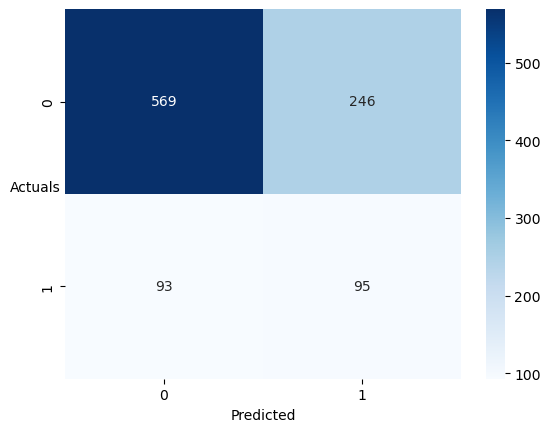

In [306]:
sns.heatmap((metrics.confusion_matrix(Final_train['Default'],y_class_pred_train1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [307]:
y_class_pred_test1=[]
for i in range(0,len(log_predict_test)):
    if np.array(log_predict_test)[i]>0.177:
        a=1
    else:
        a=0
    y_class_pred_test1.append(a)

In [308]:
print(metrics.classification_report(Final_test['Default'],y_class_pred_test1))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74       141
           1       0.17      0.34      0.23        29

    accuracy                           0.61       170
   macro avg       0.50      0.50      0.48       170
weighted avg       0.72      0.61      0.65       170



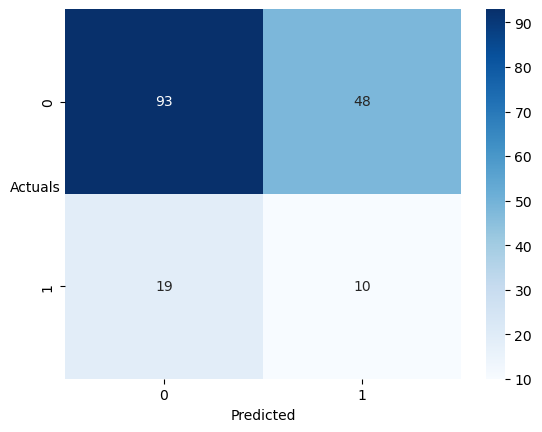

In [309]:
sns.heatmap((metrics.confusion_matrix(Final_test['Default'],y_class_pred_test1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [310]:
auc = roc_auc_score(Final_test['Default'],y_class_pred_test1)
auc

0.5022010271460015

# Hyperparameter Tuning for Random Forest

In [422]:
Rf_tuned=RandomForestClassifier(random_state=1)

In [312]:

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [15, 20, 30],
    'n_estimators':[100,150,200],
    'criterion': ['gini','entropy']
}

grid_search = GridSearchCV(estimator =Rf_tuned, param_grid = param_grid,cv=5,verbose=True)
grid_search.fit(Xtrain_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [15, 20, 30],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [313]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 15,
 'n_estimators': 100}

In [315]:
best_rf = grid_search.best_estimator_

In [318]:
RF_predict_train=best_rf.predict(Xtrain_scaled)

In [325]:
print(metrics.classification_report(y_train,RF_predict_train))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1463
           1       1.00      0.00      0.01       356

    accuracy                           0.80      1819
   macro avg       0.90      0.50      0.45      1819
weighted avg       0.84      0.80      0.72      1819



In [326]:
RF_predict_test=best_rf.predict(X_test_scaled)

In [327]:
print(metrics.classification_report(y_test,RF_predict_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       628
           1       0.00      0.00      0.00       152

    accuracy                           0.80       780
   macro avg       0.40      0.50      0.45       780
weighted avg       0.65      0.80      0.72       780



In [328]:
print (pd.DataFrame(best_rf.feature_importances_, columns = ["Imp"], index = Xtrain_scaled.columns).sort_values('Imp',ascending=False))


                                                Imp
Total_capital                                  0.06
Income_from_fincial_services                   0.04
Shares_outstanding                             0.04
Creditors_turnover                             0.03
Total_income                                   0.03
PBT                                            0.03
Net_working_capital                            0.03
Capital_employed                               0.03
Borrowings                                     0.03
Cumulative_retained_profits                    0.03
Net_worth                                      0.03
Current_liabilities_and_provisions             0.03
Finished_goods_turnover                        0.03
Current_ratio_times                            0.03
WIP_turnover                                   0.03
Net_fixed_assets                               0.03
Reserves_and_funds                             0.02
PBDITA_as_perc_of_total_income                 0.02
TOL_to_TNW  

AUC: 0.483


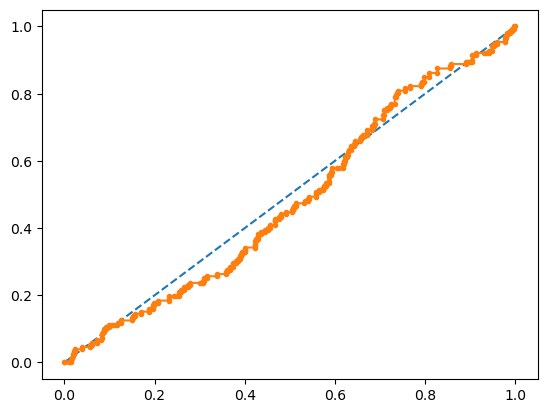

In [324]:
probs = best_rf.predict_proba(X_test_scaled)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [329]:

param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [5, 10, 20],
    'max_features':[5,10,15,17]
}

grid_search = GridSearchCV(estimator =Rf_tuned, param_grid = param_grid,verbose=True)
grid_search.fit(Xtrain_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7, 10],
                         'max_features': [5, 10, 15, 17],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [15, 20, 25]},
             verbose=True)

In [330]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 17,
 'min_samples_leaf': 10,
 'min_samples_split': 15}

In [426]:
class_weights = {0:0.1, 1: 5}

In [430]:
best_rf1 =RandomForestClassifier(max_depth=10,
 max_features=15,min_samples_leaf=15,min_samples_split=20,class_weight=class_weights,random_state=1,n_estimators=400)
best_rf1.fit(Xtrain_scaled,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 5}, max_depth=10,
                       max_features=15, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=400, random_state=1)

In [432]:
RF_predict_train1=best_rf1.predict(Xtrain_scaled)
print(metrics.classification_report(y_train,RF_predict_train1))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12      1463
           1       0.21      1.00      0.34       356

    accuracy                           0.25      1819
   macro avg       0.60      0.53      0.23      1819
weighted avg       0.84      0.25      0.16      1819



In [431]:
RF_predict_test1=best_rf1.predict(X_test_scaled)
print(metrics.classification_report(y_test,RF_predict_test1))

              precision    recall  f1-score   support

           0       0.75      0.09      0.16       628
           1       0.19      0.88      0.31       152

    accuracy                           0.24       780
   macro avg       0.47      0.48      0.24       780
weighted avg       0.64      0.24      0.19       780



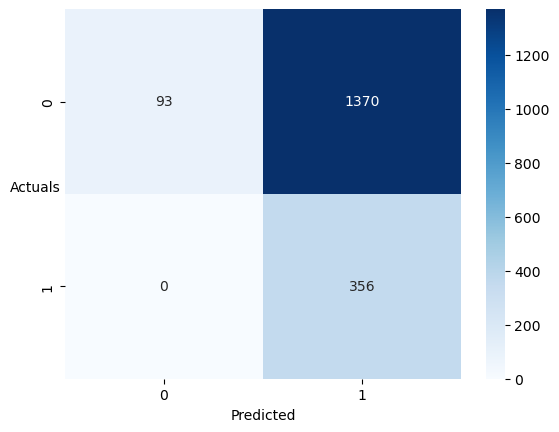

In [435]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_predict_train1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

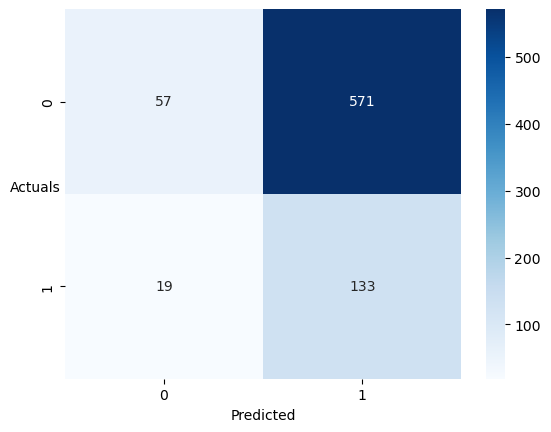

In [436]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_predict_test1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [437]:
auc = roc_auc_score(y_train,RF_predict_train1)
auc

0.5317840054682159

In [438]:
auc = roc_auc_score(y_test,RF_predict_test1)
auc

0.48288216560509556

In [439]:
print (pd.DataFrame(best_rf1.feature_importances_, columns = ["Imp"], index = Xtrain_scaled.columns).sort_values('Imp',ascending=False))


                                                Imp
Cash_to_average_cost_of_sales_per_day          0.05
Borrowings                                     0.05
Net_fixed_assets                               0.05
Debtors_turnover                               0.04
Quick_ratio_times                              0.04
Contingent_liabilities__to__Net_worth_perc     0.03
Finished_goods_turnover                        0.03
Creditors_turnover                             0.03
Raw_material_turnover                          0.03
Current_ratio_times                            0.03
Total_capital                                  0.03
Shares_outstanding                             0.03
TOL_to_TNW                                     0.03
Change_in_stock                                0.03
Net_working_capital                            0.02
PBDITA_as_perc_of_total_income                 0.02
Sales                                          0.02
WIP_turnover                                   0.02
Cash_to_curr

# Smote

In [440]:
pip install --upgrade scikit-learn imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [441]:
from imblearn.over_sampling import SMOTE 

In [442]:
X1=df2.drop('Default',axis=1)
y1=df2.pop('Default')

In [443]:
sm = SMOTE(random_state=1, sampling_strategy =1.0)
X_res, y_res = sm.fit_resample(X1, y1)

In [444]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [445]:
y_train_s.value_counts(normalize=True)

Default
0   0.50
1   0.50
Name: proportion, dtype: float64

In [446]:
y_test_s.value_counts(normalize=True)

Default
1   0.51
0   0.49
Name: proportion, dtype: float64

In [447]:
class_weights1 = {0:0.9, 1: 5}

In [456]:
best_rf_smote =RandomForestClassifier(max_depth=12,
 max_features=12,min_samples_leaf=20,min_samples_split=25,class_weight=class_weights1,random_state=1,n_estimators=300)
best_rf_smote.fit(X_train_s,y_train_s)

RandomForestClassifier(class_weight={0: 0.9, 1: 5}, max_depth=12,
                       max_features=12, min_samples_leaf=20,
                       min_samples_split=25, n_estimators=300, random_state=1)

In [457]:
RF_predict_train_smote=best_rf_smote.predict(X_train_s)
print(metrics.classification_report(y_train_s,RF_predict_train_smote))

              precision    recall  f1-score   support

           0       0.99      0.14      0.25      1473
           1       0.54      1.00      0.70      1454

    accuracy                           0.57      2927
   macro avg       0.76      0.57      0.47      2927
weighted avg       0.76      0.57      0.47      2927



In [458]:
RF_predict_test_smote=best_rf_smote.predict(X_test_s)
print(metrics.classification_report(y_test_s,RF_predict_test_smote))

              precision    recall  f1-score   support

           0       0.89      0.11      0.19       618
           1       0.53      0.99      0.69       637

    accuracy                           0.55      1255
   macro avg       0.71      0.55      0.44      1255
weighted avg       0.71      0.55      0.44      1255



In [451]:
from sklearn.metrics import roc_curve,roc_auc_score

AUC: 0.762


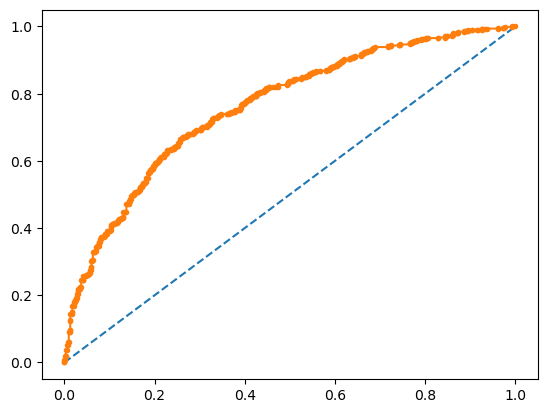

In [452]:
probs = best_rf_smote.predict_proba(X_test_s)
probs = probs[:, 1]
auc = roc_auc_score(y_test_s, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test_s, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()